<p align="center">
  <img src="images\Hub_title.png" alt="[YOUR_IMAGE_ALT]">
</p>

## **Business Understanding**

### **Overview**
Tourism is a thriving industry in Kenya, and travelers often face the challenge of choosing the right destinations for their trips. Our project aims to address this problem by creating a recommendation system that assists users in discovering personalized tourist destinations in the country.

### **Problem Statement**

Travelers often struggle to choose the most suitable tourist destinations for their trips. With an overwhelming number of options available, personalized recommendations are crucial. Our project aims to address this challenge by creating a recommendation system that suggests relevant destinations in Kenya based on user preferences and historical interactions.

#### **Stakeholders**
1. **Travelers**: They seek relevant recommendations based on their preferences, interests, and historical interactions.
2. **Tourism Agencies**: These organizations can enhance user experiences by providing tailored suggestions.
3. **Local Businesses**: Recommendations can drive footfall to local attractions, restaurants, and accommodations.

### **Objectives**:

- Build a collaborative filtering model to recommend destinations.
- Reduce cold-start problem by incorporating content-based features.
- Use NLP to recommend items based on sentiment analysis of reviews.
- Generate insights from user interaction data to understand trends, preferences, and popular destinations.
- Suggest a wide range of destinations, including both popular and less-known locations to cater to different travel preferences.
- Promote local hotels, destinations and tour agents through our web application.

### **Proposed Solution and Metrics of Success**
We propose building a hybrid recommendation system that combines collaborative filtering and content-based approaches. Success metrics include accuracy, recall and precision scores.

### **Challenges**

1. **Data Quality and Diversity**:
   - Presence of missing values, outliers, or inaccuracies.
   - Ensuring diverse and representative data across different types of destinations (e.g., cities, beaches, historical sites) is essential.

2. **Cold-Start Problem**:
   - New users with limited interaction history pose a challenge. How do we recommend destinations for them?
   - Balancing collaborative filtering (based on user behavior) with content-based filtering (based on destination features) is critical.

3. **Scalability and Real-Time Recommendations**:
   - As the user base grows, the system must handle increased computational demands.
   - Providing real-time recommendations during user interactions requires efficient algorithms.

4. **User Engagement and Interpretability**:
   - Recommendations should align with user interests to keep them engaged.
   - Ensuring transparency and interpretability of the recommendation process is important.

### **Conclusion**
Our project has significant implications for travelers, tourism agencies, and local businesses. By solving this problem, we contribute to enhancing travel experiences and promoting local economies.


## **Data Understanding**

### Data Sources and Relevance
- The dataset was scraped using the **APIFY Tripadvisor Scraper**.
- It contains information about tourist destinations, including their names, categories, ratings, review counts, images, and other relevant features.
- The data's relevance lies in its ability to help us recommend destinations to travelers based on their preferences and historical interactions.

### **Dataset Overview**
- The dataset consists of **5544 entries** (rows).
- Key columns include:
  - **Name**: The name of the destination.
  - **Category**: The type of destination (e.g., city, beach, historical site).
  - **Rating**: The average user rating (ranging from 1.0 to 5.0).
  - **Number of Reviews**: The count of user reviews.
  - **Image**: URLs to images representing the destinations.
  - **Photo Count**: The number of photos associated with each destination.
  - **Price Range**: Information about the cost level (if available).
  - **Review Tags**: Descriptive tags associated with reviews.
  - **Photos**: Additional photo URLs.
  - **Price Level**: Indication of price range (if available).
  - **Location String**: The location and province.

### **Justification for Feature Inclusion**
- **Name**, **Category**, and **Rating**: Essential for personalized recommendations.
- **Number of Reviews**: Reflects popularity and user engagement.
- **Image** and **Photo Count**: Enhance user experience.
- **Price Range** and **Price Level**: Useful for budget-conscious travelers.
- **Review Tags**: Provides insights into user preferences.
- **Location String**: Gives knowledge of the Geographic location.

### **Data Limitations**
- **Missing Values**: Some entries lack ratings, images, or price information.
- **Limited Price Data**: Only 2713 entries have price-related details.
- **Data Quality**: Ensure data quality and handle missing values appropriately.

## **Data Preparation**

### **Data Loading**

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import modeling toolkit
import recommender
from recommender import DataSourcing, DataPreprocessing, DataAnalysis

# Modeling
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.svm import SVC

# Evaluation
from sklearn.metrics import classification_report

# Deployment
import joblib

In [2]:
# Initialize the data loading class
ds = DataSourcing()

files = [
        "data\kenya.json", "data\Tripadvisor1.json",
        "data\Tripadvisor2.json", "data\Tripadvisor3.json", "data\Tripadvisor4.json"
        ]
expected_columns = [
        "name", "category", "rating", "numberOfReviews",
        "image", "photoCount", "priceRange", "reviewTags",
        "priceLevel", "locationString"
                    ]

data = ds.read_json_files(files, expected_columns)

***DataFrame info***

In [3]:
ds.dataframe_details(data)

DATAFRAME SHAPE: (5544, 10)


DATAFRAME HEAD:
                                      name    category  rating  \
0                         Observation Hill  attraction     4.5   
1             Mount Longonot National Park  attraction     4.5   
2  Karen Blixen Coffee Garden and Cottages  attraction     4.5   
3                           Kiambethu Farm  attraction     5.0   
4                        Fort Jesus Museum  attraction     4.0   

   numberOfReviews                                              image  \
0              782  https://media-cdn.tripadvisor.com/media/photo-...   
1              208  https://media-cdn.tripadvisor.com/media/photo-...   
2              591  https://media-cdn.tripadvisor.com/media/photo-...   
3              226  https://media-cdn.tripadvisor.com/media/photo-...   
4              978  https://media-cdn.tripadvisor.com/media/photo-...   

   photoCount priceRange                                         reviewTags  \
0         423        NaN  [{'text': 'gr

### **Data Cleaning**
***Check for Duplicates***

In [4]:
# Initialize the data preprocessing class
dp = DataPreprocessing()

# Convert list columns to strings to avoid unhashable type errors
data['reviewTags'] = data['reviewTags'].apply(lambda x: str(x) if isinstance(x, list) else x)

# Check for duplicates
dp.check_duplicates(data)

There are 784 duplicates in the data.


*Drop Duplicates*

In [5]:
# Drop the duplicate rows
data = data.drop_duplicates()

# Drop the duplicate names to remain with unique names
data.drop_duplicates(subset=['name'], inplace=True)

# Check for duplicates
dp.check_duplicates(data)

There are 0 duplicates in the data.


### **Feature Engineering**

In [6]:
# Check columns
data.columns

Index(['name', 'category', 'rating', 'numberOfReviews', 'image', 'photoCount',
       'priceRange', 'reviewTags', 'priceLevel', 'locationString'],
      dtype='object')

#### ***1. Extract `reviews` and `texts` from `reviewTags`***

In [7]:
# Convert the string representations of lists of dictionaries to actual lists of dictionaries

# Extract texts and reviews from the reviewTags column

# Display the updated DataFrame
dp.extract_reviews_and_texts(data)

reviewTags  \
0  [{'text': 'great view', 'reviews': 55}, {'text...   
1  [{'text': 'crater rim', 'reviews': 18}, {'text...   
2  [{'text': 'movie', 'reviews': 42}, {'text': 'a...   
3  [{'text': 'indigenous forest', 'reviews': 22},...   
4  [{'text': 'old town', 'reviews': 132}, {'text'...   

                                               texts  \
0  [great view, vantage point, entire park, short...   
1  [crater rim, day trip, start early, amazing vi...   
2                  [movie, africa, giraffes, safari]   
3  [indigenous forest, tea plantation, delicious ...   
4  [old town, interesting history, slave trade, t...   

                                             reviews  
0  [55, 17, 16, 15, 11, 8, 89, 141, 137, 81, 98, ...  
1  [18, 14, 10, 8, 5, 4, 4, 3, 3, 3, 2, 2, 2, 2, ...  
2                                   [42, 94, 10, 14]  
3  [22, 27, 16, 14, 6, 6, 5, 4, 4, 3, 3, 5, 64, 2...  
4  [132, 17, 17, 46, 28, 9, 14, 14, 121, 28, 36, ...

#### ***2. Decode the `priceLevel` column***

In [10]:
data['priceLevel'].value_counts()

$       443
$$      292
$$$$    213
$$$     118
Name: priceLevel, dtype: int64

*Map the `$` into their corresponding categories*

1. **Luxury**: The most expensive category, offering premium services and facilities.

2. **Premium**: Mid-range in price, providing high-quality services and accommodations.

3. **Standard**: Affordable options with good services and facilities.

4. **Budget**: The most economical choice, offering basic services and accommodations.

In [8]:
# Mapping method
dp.decode_price_level(data)

# Display the Unique values and their counts
data['priceLevel'].value_counts()

Unknown     896
Budget      443
Standard    292
Luxury      213
Premium     118
Name: priceLevel, dtype: int64

#### ***3. Create new price columns (`upperPrice` & `lowerPrice`)***

In [14]:
# Extract unique values from the priceRange column

# Convert USD prices to KES and extract lowerPrice and upperPrice

# Fill missing values with NaN

dp.create_price_columns(data)

print('Unique Prices:\n')
print(data[['upperPrice', 'lowerPrice']].nunique())
print('\n\nPrice Description:')
data[['upperPrice', 'lowerPrice']].describe()

Unique Prices:

upperPrice    564
lowerPrice    511
dtype: int64


Price Description:


upperPrice     lowerPrice
count  1.066000e+03    1066.000000
mean   4.741493e+04   27649.968105
std    1.736039e+05   39729.503358
min    1.410000e+02     141.000000
25%    1.054900e+04    7876.000000
50%    1.969100e+04   14065.000000
75%    4.112675e+04   27567.000000
max    5.237693e+06  351758.000000

#### ***4. Create new column (`weighted_sentiment`) for Sentiment Analysis of Reviews***

##### *STEPS*

    Step 1: Perform Sentiment Analysis

    - We will use TextBlob to calculate the sentiment polarity. (Polarity is a float within the range [-1.0, 1.0], where -1.0 represents a negative sentiment and 1.0 represents a positive sentiment.)

    Step 2: Weight the Sentiment Scores

    Step 3: Aggregate the Weighted Scores

  

We will create an additional column, `adjusted_sentiment`, that is formed by calculating the bayesian average. It helps in balancing the sentiment score with the number of reviews, preventing entities with few reviews from ranking disproportionately high or low.. This column can be used to make recommendations based on the overall sentiment of reviews.

In [15]:
# !pip install textblob

# Perform sentiment analysis and calculate weighted sentiment scores

# Use Bayesian Average statistical method to balance the sentiment score with the number of reviews, preventing
# entities with few reviews from ranking disproportionately high or low.


dp.create_sentiment_columns(data)


review_data = data[['name','texts','reviews', 'numberOfReviews', 'weighted_sentiment', 'adjusted_sentiment']]

# Display the updated DataFrame
review_data.head()

name  \
0                         Observation Hill   
1             Mount Longonot National Park   
2  Karen Blixen Coffee Garden and Cottages   
3                           Kiambethu Farm   
4                        Fort Jesus Museum   

                                               texts  \
0  [great view, vantage point, entire park, short...   
1  [crater rim, day trip, start early, amazing vi...   
2                  [movie, africa, giraffes, safari]   
3  [indigenous forest, tea plantation, delicious ...   
4  [old town, interesting history, slave trade, t...   

                                             reviews  numberOfReviews  \
0  [55, 17, 16, 15, 11, 8, 89, 141, 137, 81, 98, ...              782   
1  [18, 14, 10, 8, 5, 4, 4, 3, 3, 3, 2, 2, 2, 2, ...              208   
2                                   [42, 94, 10, 14]              591   
3  [22, 27, 16, 14, 6, 6, 5, 4, 4, 3, 3, 5, 64, 2...              226   
4  [132, 17, 17, 46, 28, 9, 14, 14, 121, 28, 36, ...              978   

   weighted_sentiment  adjusted_sentiment  
0            0.039423            0.039152  
1            0.038617            0.037670  
2            0.000000            0.000299  
3            0.050552            0.049171  
4            0.047081            0.046786

#### ***5. Extract the `location` & `province` from `locationString`***

In [18]:
data['locationString'].value_counts().head()

Nairobi                                               457
Maasai Mara National Reserve, Rift Valley Province    139
Watamu, Coast Province                                108
Diani Beach, Ukunda, Coast Province                    87
Mombasa, Coast Province                                77
Name: locationString, dtype: int64

In [19]:
# Replace empty strings or null-like values with np.nan

# Extract the location (before the first comma)

# Extract the province (after the last comma)

# Display the DataFrame with the new columns
dp.extract_location_and_province(data)


location              province
0  Amboseli National Park  Rift Valley Province
1              Maai Mahiu  Rift Valley Province
2                 Nairobi               Nairobi
3                  Limuru      Central Province
4                 Mombasa        Coast Province

#### ***6. Create a new value `tour operator` in the `category column`***

There are tour operators categorized as attractions. Let's separate them into their own category for better classification based on the following keywords:

keywords = ['safari', 'safaris', 'tour', 'tours', 'adventure',
            'adventures', 'expeditions', 'expedition', 'travels',
            'travel', 'travellers', 'escursioni']
            
hotel_keywords = ['cottages', 'spa', 'lodge', 'camp', 'club', 'hotel', 'resort']

In [21]:
# Search category values using keywords

# Update category with priority for hotel-related words to prevent wrong categorization

# Apply the function to update the 'category' column

# Display the updates
print('Original category column:')
print(data['category'].value_counts())
print('\n\nUpdated category column:')
dp.update_category_column(data)

Original category column:
hotel            1404
tour operator     391
attraction        167
Name: category, dtype: int64


Updated category column:


hotel            1404
tour operator     391
attraction        167
Name: category, dtype: int64

## **EDA**

In [22]:
# Initialize the data analysis and visualization class
eda = DataAnalysis()

#### ***1. Visual of the Destinations***

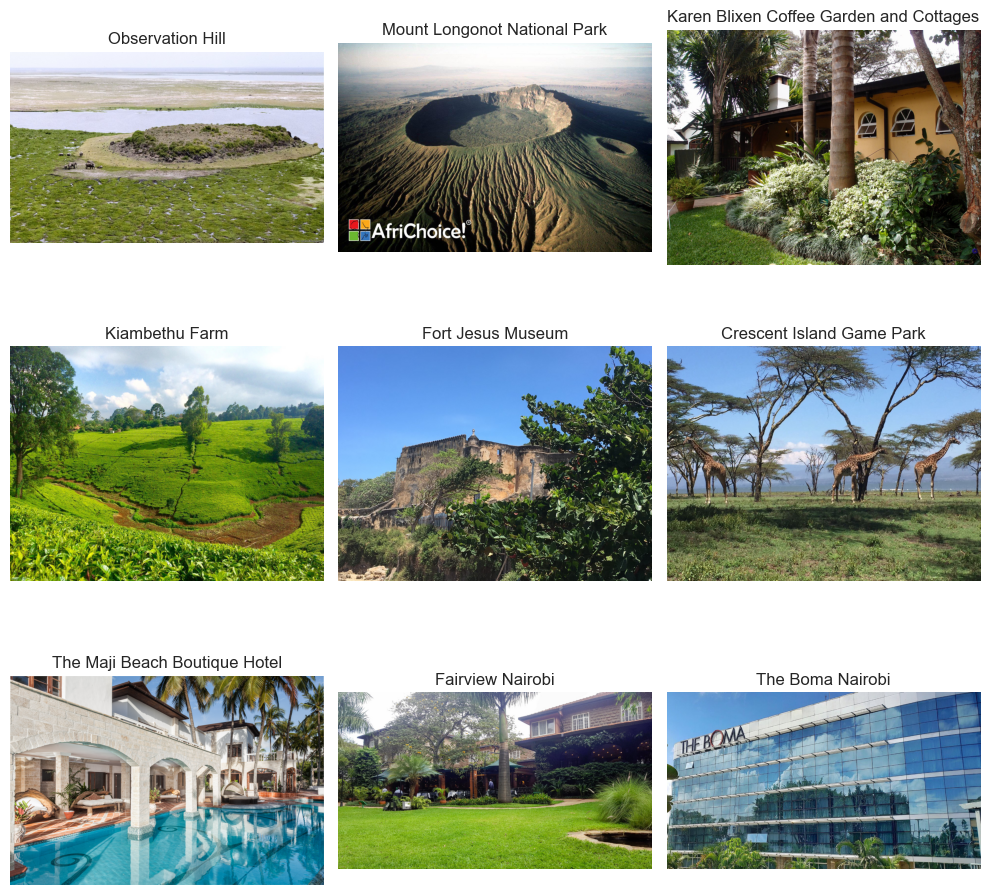

In [23]:
eda.visualize_destinations(data)

#### ***2. Review Bigrams Visual***

A visualization of the most common bigrams in the reviews, weighted by the number of reviews, can be useful for the tour recommendation system to find the most popular words used in the reviews.

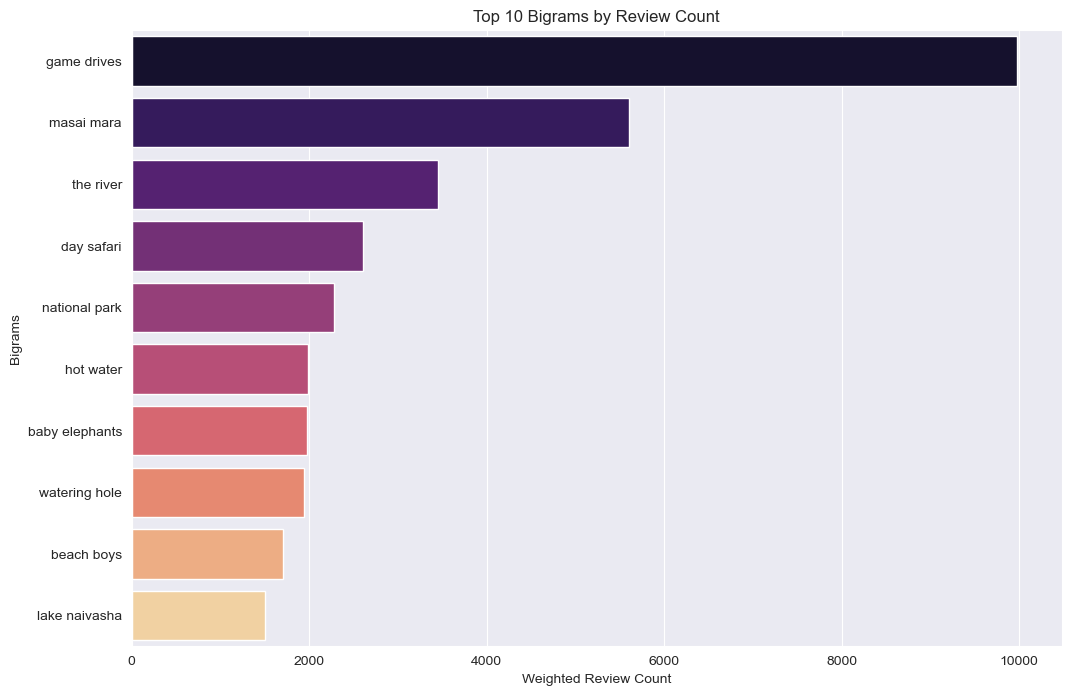

In [24]:

eda.visualize_bigrams(data)

#### ***3. Word Cloud Visual of Reviews***

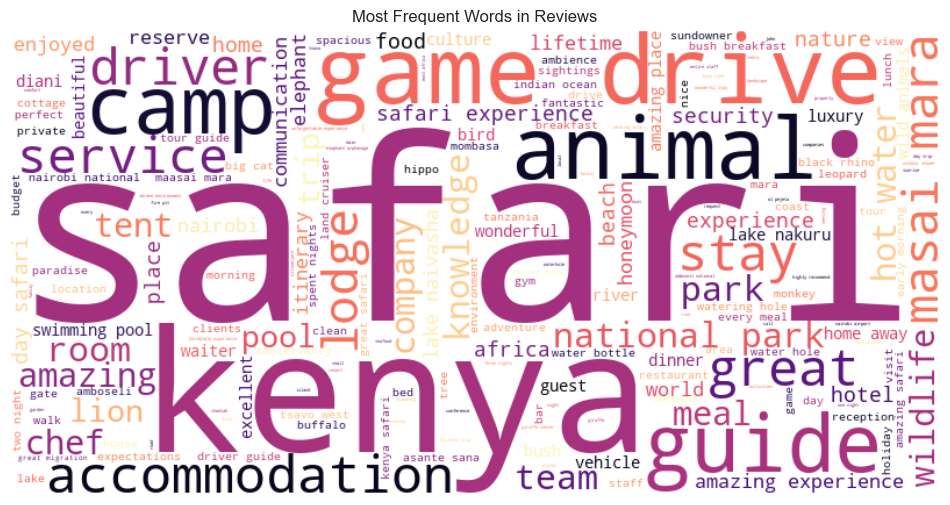

20 most common words:
safari: 846
the: 485
experience: 477
kenya: 473
game: 432
amazing: 385
guide: 379
mara: 354
animals: 349
great: 341
drives: 301
driver: 299
camp: 292
stay: 285
water: 266
place: 241
park: 237
trip: 233
pool: 226
masai: 223


In [25]:
eda.frequent_words_in_reviews(data)


##### Summary of Key Themes

- **Safari and Wildlife:** The dominant theme is wildlife experiences, highlighted by terms like "safari," "wildlife," "animals," "game drive," and specific animals such as lion, elephant, and giraffe. This suggests a strong emphasis on safari and wildlife activities.

- **Accommodation and Service:** Key terms include "lodge," "camp," "hotel," "service," and "staff," reflecting a focus on guest accommodation and overall service quality.

- **Location:** Geographic terms such as "Masai Mara," "Lake Naivasha," "Kenya," and "Nairobi" underscore the regional focus of the reviews.

- **Positive Sentiment:** Words like "amazing," "great," "beautiful," and "wonderful" point to an overall positive sentiment towards the reviewed experiences.


### ***4. What are the most common review tags associated with highly-rated attractions ?***

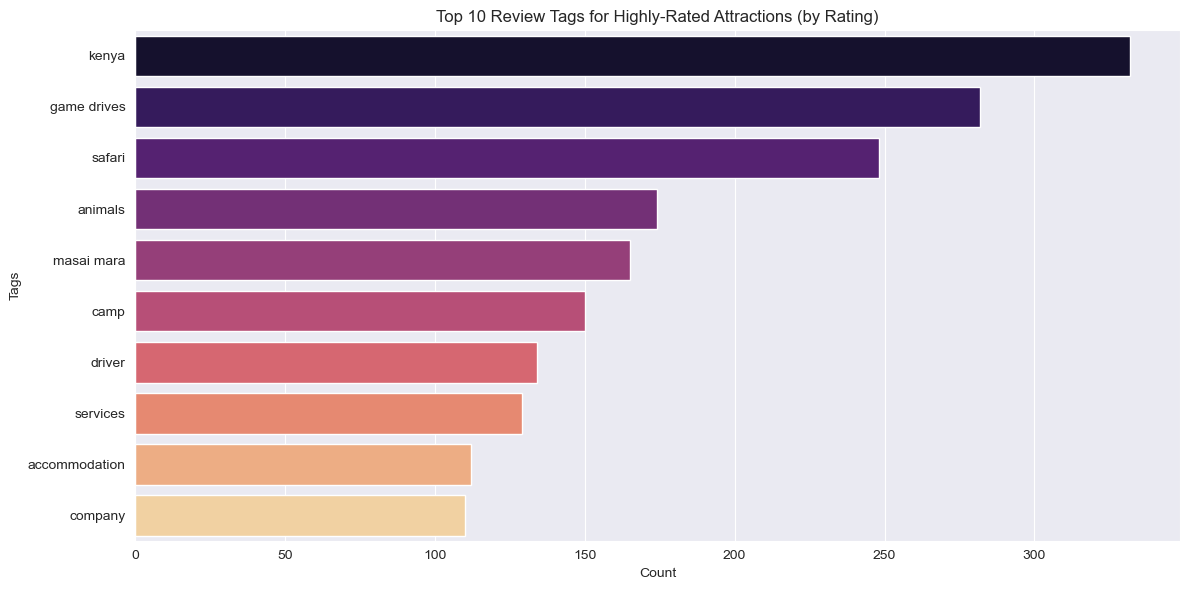

In [26]:
eda.common_review_tags(data)

### ***5. What are the most frequently used words in customer reviews for each specific category ?***

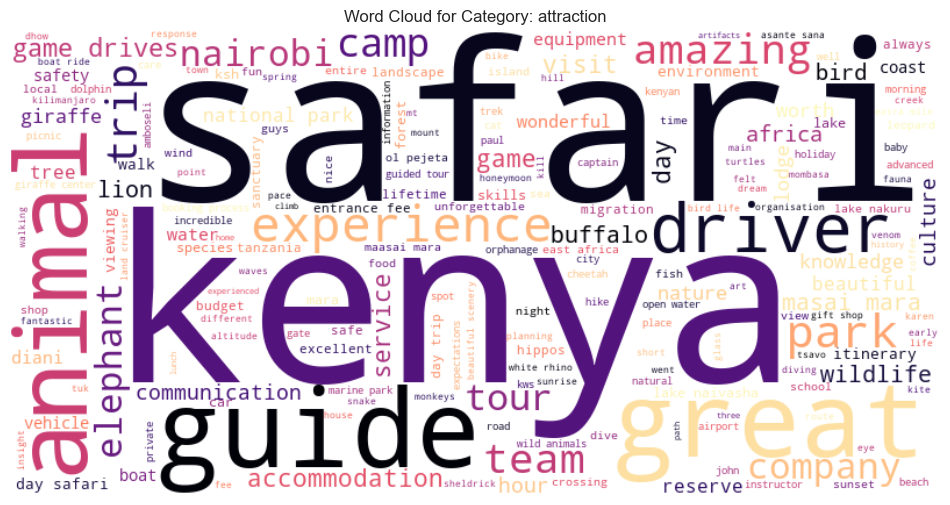

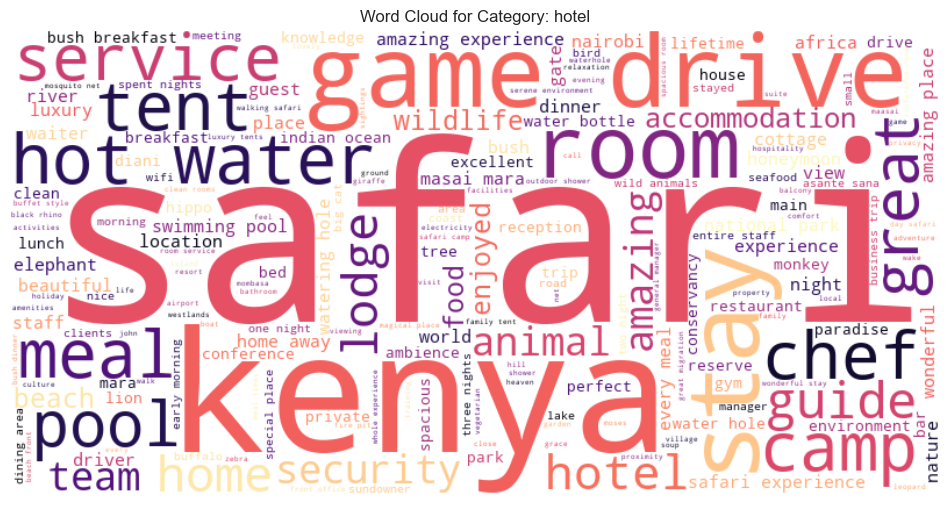

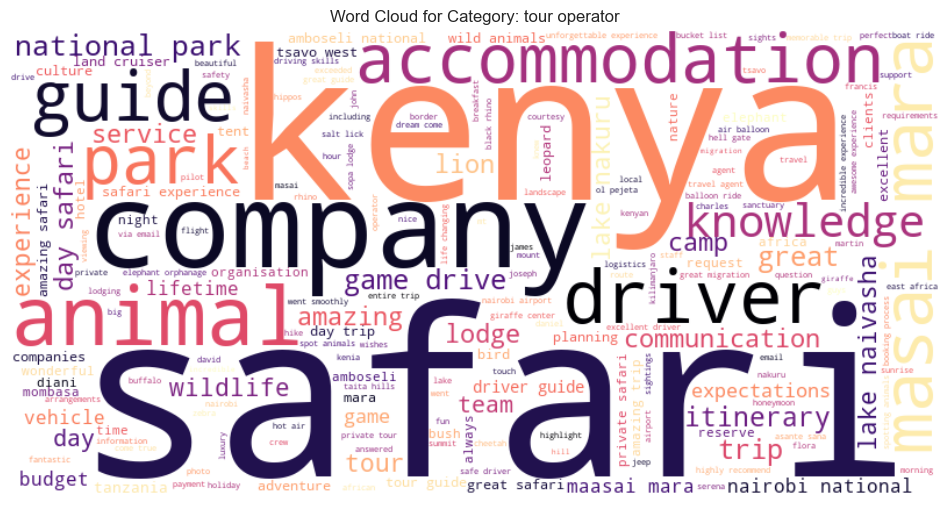

In [27]:
eda.frequent_words_by_category(data)

#### Word Cloud Insights

##### Category: "Attraction"

**Dominant Words:** Safari, Kenya, Guide, Park, Driver, Animal, Experience, Great, National Park, Company

**Key Insights:**
- Safari is the primary attraction, with Kenya being a strong associated term.
- Guided experiences and park visits are crucial aspects.
- The presence of "driver" and "company" suggests organized tours are popular.
- Positive sentiment is indicated by words like "experience" and "great."

##### Category: "Hotel"

**Dominant Words:** Camp, Game, Stay, Food, Animal, Lodge, Pool, Room Service, Hot Water, Tent

**Key Insights:**
- This category focuses on accommodation and facilities within a safari setting.
- Camping and lodges are popular options.
- Amenities like food, pool, and hot water are valued.
- The word "animal" suggests proximity to wildlife is important.

##### Category: "Tour Operator"

**Dominant Words:** Company, Safari, Guide, Team, Knowledge, Masai Mara, Itinerary, Communication, Driver, Animal

**Key Insights:**
- This category emphasizes the role of the operator in providing a safari experience.
- Expertise and knowledge are important attributes of the operator.
- The presence of "Masai Mara" and "itinerary" suggests specific destinations and planned trips.
- Good communication and a strong team are valued.

#### Overall Insights:
- Safari in Kenya is the core attraction.
- Guided tours and organized experiences are preferred.
- Accommodation options range from camping to lodges with amenities.
- Operators play a crucial role in providing a successful safari experience.
- Positive sentiment towards the overall experience is evident.


### ***6. Univariate Analysis***

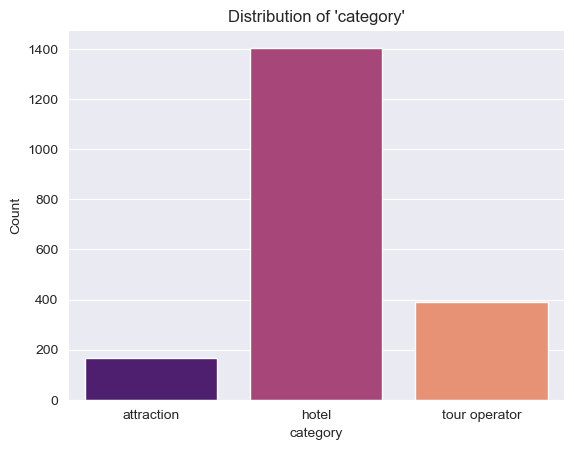

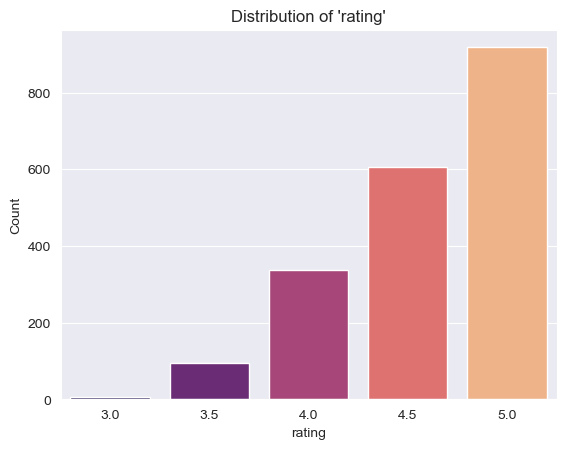

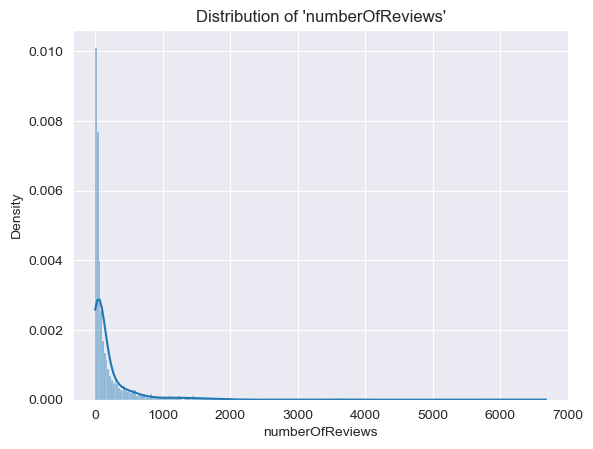

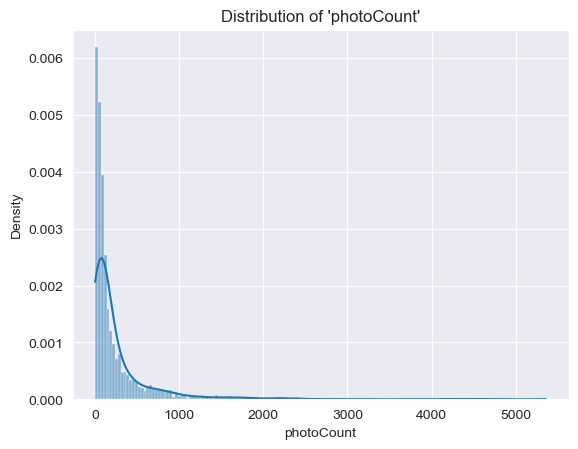

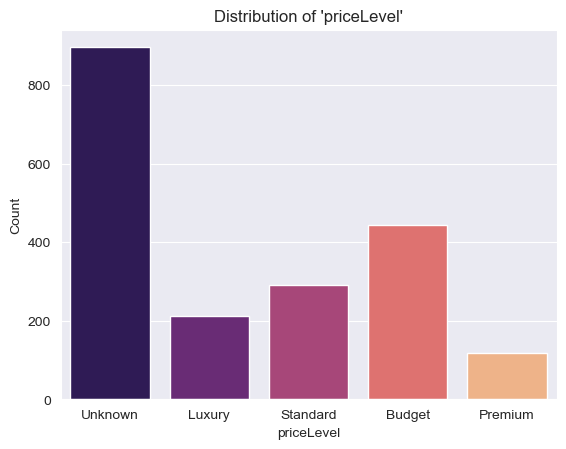

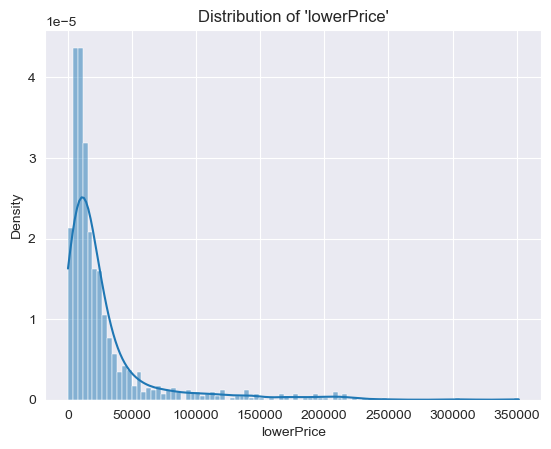

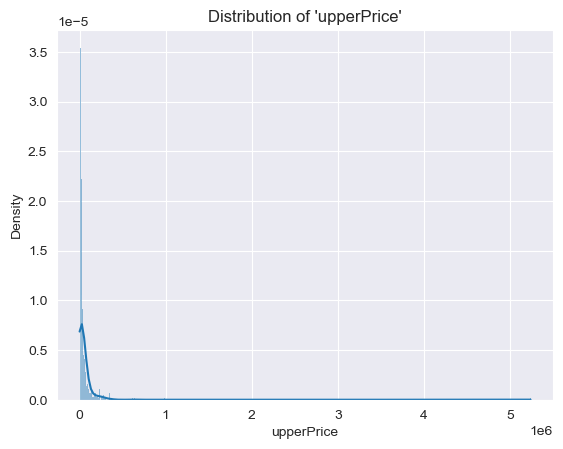

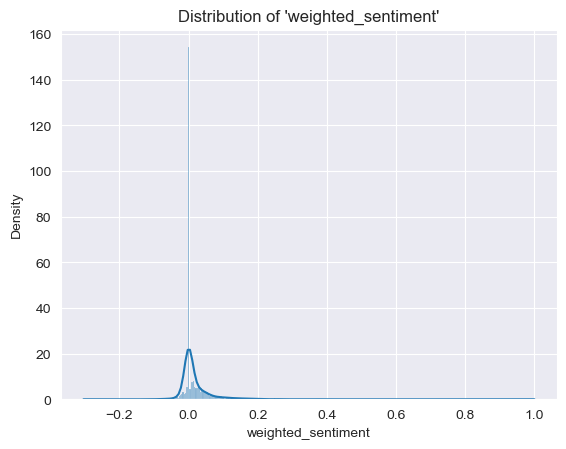

In [28]:
exclude = ['name', 'image', 'priceRange', 'reviewTags', 'photos', 'reviews', 'texts', 'adjusted_sentiment',
           'bigram_counts', 'location', 'province', 'locationString', 'flattened_bigrams']

eda.plot_distribution(data, exclude_columns=exclude)

#### Distribution Insights
- **Rating Distribution:** The distribution is heavily skewed towards higher ratings, with a sharp peak around 4.5 and a long tail towards lower ratings. This suggests that while most reviews are positive, there's still a significant portion with lower ratings.
  
- **Number of Reviews Distribution:** The distribution is skewed, with most businesses having a lower number of reviews and a few outliers with a large number of reviews, indicating a few businesses dominate in visibility.
  
- **Average Price Distribution:** The distribution is highly skewed, with the majority of businesses having low average prices. A few outliers have significantly higher average prices.

#### Insights
- **Tourist Satisfaction:** The high concentration of ratings around 4.5 suggests overall tourist satisfaction is relatively high, though there's room for improvement as indicated by the long tail of lower ratings.
  
- **Market Competition:** The skewed distribution of the number of reviews suggests a competitive market, with a few businesses attracting most of the tourist attention.
  
- **Price Sensitivity:** The highly skewed average price distribution indicates that the market largely caters to budget-conscious tourists, suggesting that businesses with higher prices may need to focus on differentiation beyond just price.


### ***7. Correlation Analysis***

Label encode the priceLevel so as to perform a correlation analysis.

In [29]:
dp.label_encode_columns(data, ['priceLevel'])

***Correlation Matrix***

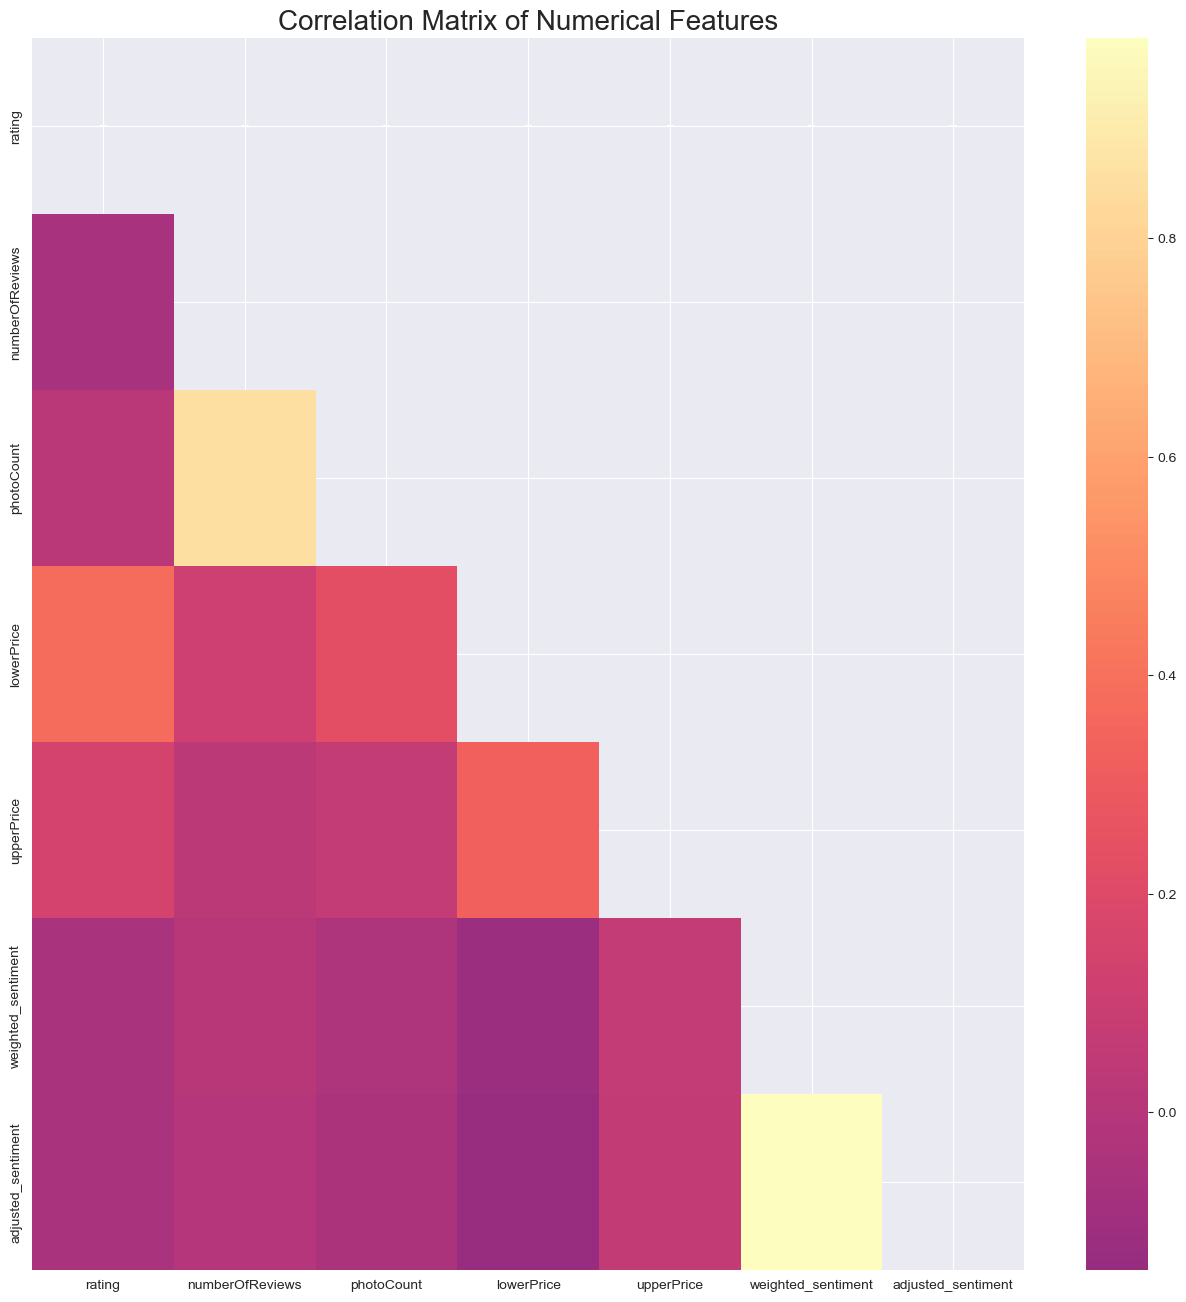

In [32]:
# Create a correlation matrix
numerical_columns = [
    'rating',
    'numberOfReviews',
    'photoCount',
    'lowerPrice',
    'upperPrice',
    'weighted_sentiment',
    'adjusted_sentiment'
]

eda.correlation_matrix(data, numerical_columns)

In [33]:
# Correlation matrix
correlation_matrix = data[['rating', 'numberOfReviews', 'photoCount', 'lowerPrice', 'upperPrice', 'weighted_sentiment', 'adjusted_sentiment']].corr()
correlation_matrix


rating  numberOfReviews  photoCount  lowerPrice  \
rating              1.000000        -0.066038    0.019713    0.376862   
numberOfReviews    -0.066038         1.000000    0.856512    0.114381   
photoCount          0.019713         0.856512    1.000000    0.228793   
lowerPrice          0.376862         0.114381    0.228793    1.000000   
upperPrice          0.138598         0.030369    0.070258    0.329648   
weighted_sentiment -0.053227         0.003279   -0.031107   -0.123438   
adjusted_sentiment -0.053412        -0.006440   -0.047374   -0.144134   

                    upperPrice  weighted_sentiment  adjusted_sentiment  
rating                0.138598           -0.053227           -0.053412  
numberOfReviews       0.030369            0.003279           -0.006440  
photoCount            0.070258           -0.031107           -0.047374  
lowerPrice            0.329648           -0.123438           -0.144134  
upperPrice            1.000000            0.071007            0.056691  
weighted_sentiment    0.071007            1.000000            0.983304  
adjusted_sentiment    0.056691            0.983304            1.000000

####  ***Is there a relationship between the number of photos a listing has and its rating or number of reviews?***

Correlation between photo count and rating: 0.02
Correlation between photo count and number of reviews: 0.86


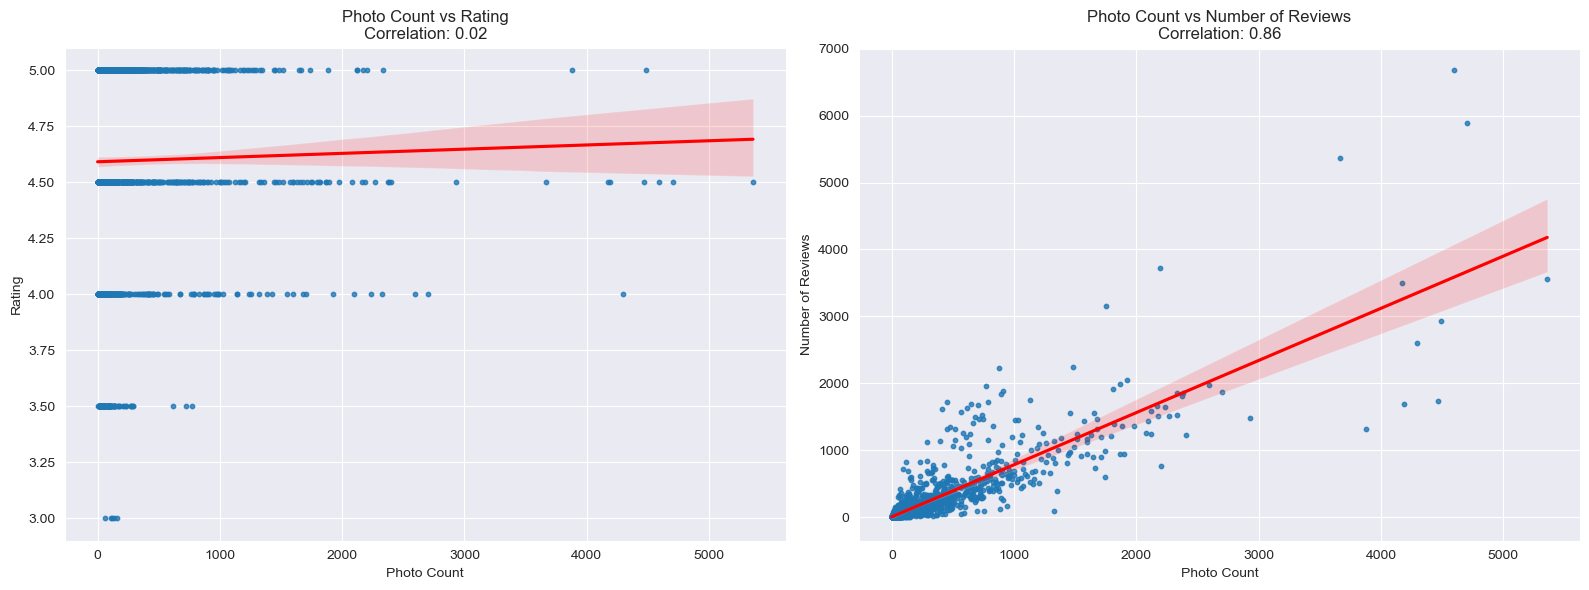

In [34]:
eda.analyze_photo_rating_reviews_corr(data)

#### Correlation Insights:

- **`Photo Count` and `Number of Reviews`:** Have a strong positive correlation (0.86), suggesting that restaurants with more reviews tend to have more photos.

- **`Photo Count` and `Rating`:** The quality of the photos, rather than the quantity, likely has a greater impact on the rating.
Focus on uploading high-quality, relevant images to showcase the listing effectively.

- **`Photo Count` and `Reviews`:** More photos can attract attention and encourage users to engage with the listing, leading to more reviews.

#### ***How do the lower and upper price ranges vary across different price levels***

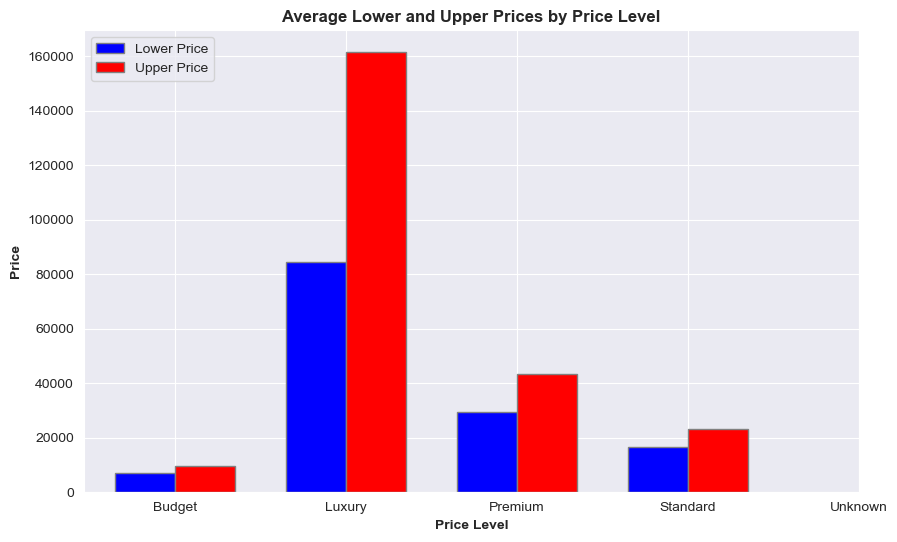

In [35]:
eda.price_range_variation(data)

In [36]:
price_level_range = data.groupby('priceLevel').agg({
    'lowerPrice': 'mean',
    'upperPrice': 'mean'
})
price_level_range

lowerPrice     upperPrice
priceLevel                             
Budget       7052.455982    9709.753950
Luxury      84448.201878  161406.985915
Premium     29355.991525   43260.194915
Standard    16777.924658   23145.561644
Unknown              NaN            NaN

* **Price Gap:** The difference between the average lower and upper prices is noticeable within each price level, indicating a range of options available for consumers. This gap is particularly pronounced in the Luxury and Premium segments.

### ***8. Which provinces have the most listings***

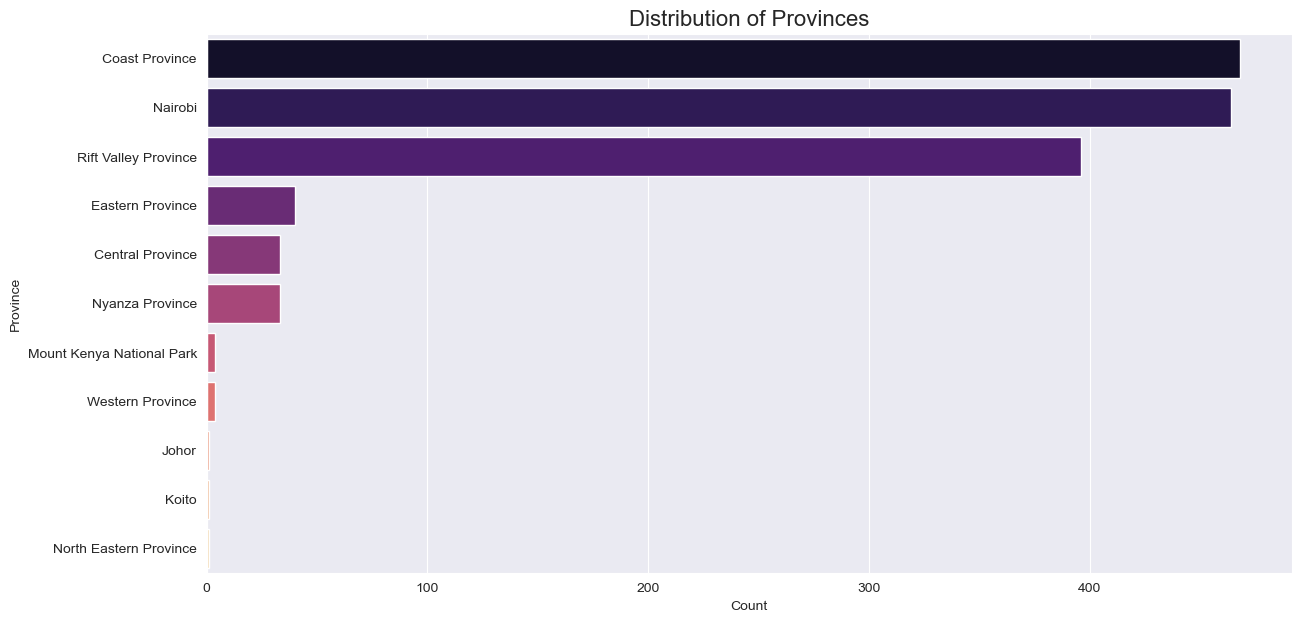

In [37]:
eda.analyze_province_distribution(data)

### ***9. How does the average sentiment vary across different provinces?***

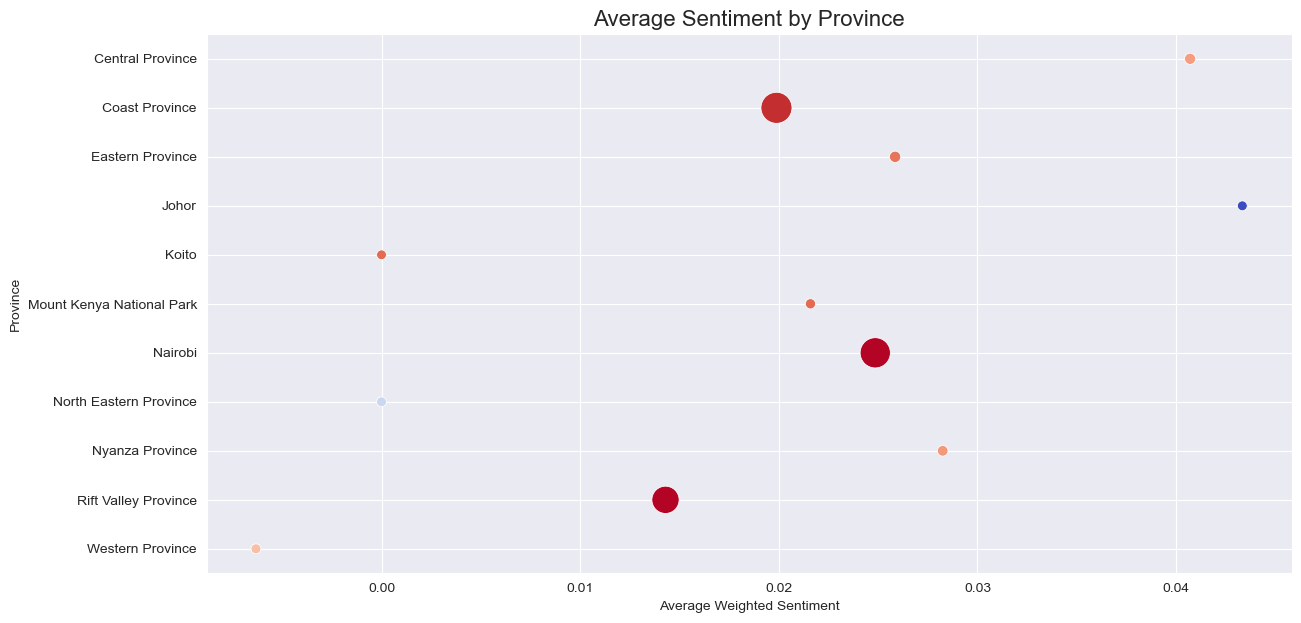

In [38]:
# Aggregate data by province
province_aggregates = data.groupby('province').agg({
    'rating': 'mean',
    'numberOfReviews': 'sum',
    'weighted_sentiment': 'mean',
    'adjusted_sentiment': 'mean'
}).reset_index()

# Rename columns for clarity
province_aggregates.columns = ['Province', 'Average Rating', 'Total Reviews', 'Average Weighted Sentiment', 'Average Adjusted Sentiment']

eda.analyze_sentiment_by_province(province_aggregates)


- **High Sentiment:** A few provinces stand out with notably higher sentiment scores:
  - Nairobi
  - Rift Valley Province
  - Coast Province
  
  This could indicate factors contributing to positive sentiment
- **Low Sentiment:** Several provinces exhibit lower sentiment scores, with some clustering near the 0.00 mark:
  - Central Province
  - Western Province
  - North Eastern Province


### ***10. How do average ratings  and total number of reviews vary across different categories?***

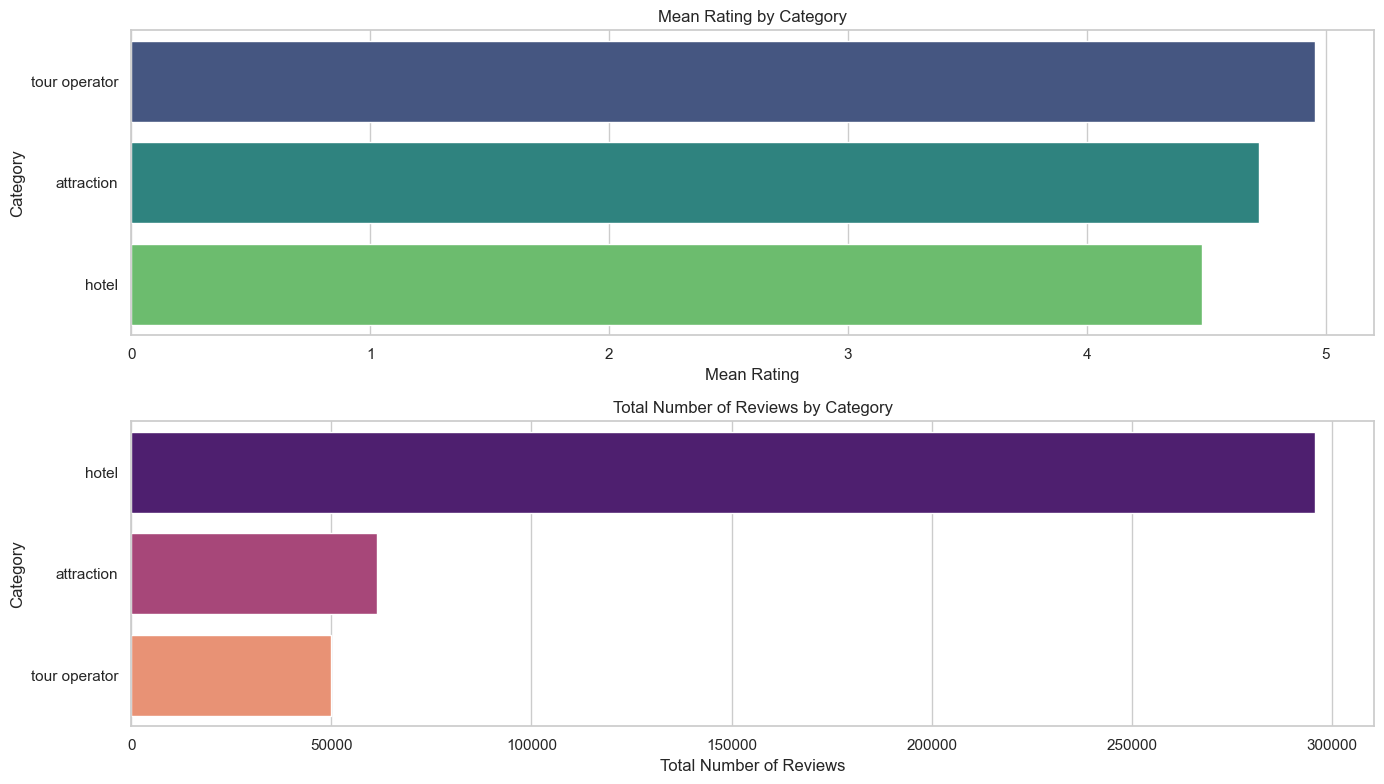

In [39]:
eda.analyze_ratings_reviews_by_category(data)

In [40]:
# Average Rating and Number of Reviews by Category
review_stats_by_category = data.groupby('category')[['rating', 'numberOfReviews']].mean().reset_index()
review_stats_by_category.columns = ['Category', 'Average Rating', 'Average Number of Reviews']
review_stats_by_category

Category  Average Rating  Average Number of Reviews
0     attraction        4.722892                 367.215569
1          hotel        4.481098                 210.658832
2  tour operator        4.955243                 127.846547

**Tour Operators Shine**
- Tour operators have the highest average rating, indicating strong customer satisfaction with their services.
- However, they have the lowest number of reviews, which could suggest less exposure or a smaller tourists base compared to other categories.

**Hotels Dominate Reviews**
- Hotels receive the most reviews, making them the most reviewed category.
- This could be due to a larger number of hotels or a higher tendency for tourists to leave reviews for hotel experiences.

**Attraction Satisfaction**
- Attractions fall in the middle for both average rating and total number of reviews.
- This suggests a balance between tourists satisfaction and review volume.


### ***11. What is the average price range for different categories?***

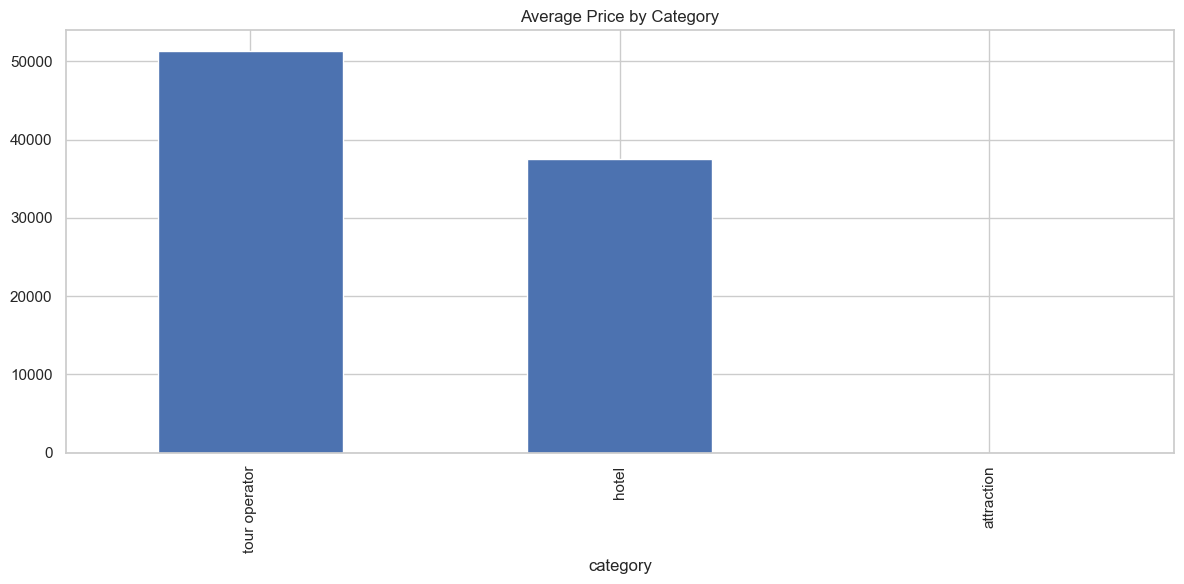

In [41]:
data['averagePrice'] = (data['lowerPrice'] + data['upperPrice']) / 2

eda.analyze_avg_price_by_category(data)

### **EDA Summary**

The attraction category completely lacks price data and this presents a challenge. We will handle the issue by creating separate models for each category.

We will build 3 different recommendation models: one for each category. Since attractions & most tour operators don’t have price data, we will exclude priceLevel from the models and focus on other features like rating, reviews and sentiments.

This approach will allow tailoring SafariHub recommendation model specifically to the available data for each category.

In [37]:
# data.to_csv('C:/Users/Hp/Documents/DATA_SCIENCE/MORINGA/PHASE_5-Final_Project/SafariHub/data.csv', index=False)

# **Modeling**

## **Preprocessing**

#### ***1. Encode the `location`, `province` and `category` columns so as to fit them into the models.***

In [44]:
cols = ['location','province','category']
dp.label_encode_columns(data, cols)

#### ***2. Split the data into categories***

The data is split so as to work with the different requirements. This is to avoid dropping rows that don't have price values which would be helpful for the hotel category.

In [39]:
# Filter the rows where the 'category' is 'attraction'
attraction_data = data[data['category'] == 'attraction'][[
    'name', 'category', 'rating', 'numberOfReviews', 'photoCount','category_encoded', 'location',
    'reviewTags', 'priceLevel', 'texts', 'reviews', 'weighted_sentiment', 'adjusted_sentiment',
    'bigram_counts', 'priceLevel_encoded', 'location_encoded', 'province_encoded', 'flattened_bigrams'
]]

# Filter the rows where the 'category' is 'hotel'
hotel_data = data[data['category'] == 'hotel'][[
    'name', 'category', 'rating', 'numberOfReviews', 'photoCount','category_encoded',
    'priceRange', 'reviewTags', 'priceLevel', 'texts', 'reviews',
    'lowerPrice', 'upperPrice', 'weighted_sentiment', 'adjusted_sentiment',
    'bigram_counts', 'priceLevel_encoded', 'location_encoded', 'province_encoded', 'flattened_bigrams'
]]

# Filter the rows where the 'category' is 'tours'
tours_data = data[data['category'] == 'tour operator'][[
    'name', 'category', 'rating', 'numberOfReviews', 'photoCount','category_encoded',
    'reviewTags', 'priceLevel', 'texts', 'reviews', 'weighted_sentiment', 'adjusted_sentiment',
    'bigram_counts', 'priceLevel_encoded', 'location_encoded', 'province_encoded', 'flattened_bigrams'
]]

In [40]:
print(attraction_data.shape)
print(hotel_data.shape)
print(tours_data.shape)

(167, 18)
(1404, 20)
(391, 18)


#### ***3. Drop null values***

In [41]:
attraction_data = attraction_data.dropna()
attraction_data.reset_index(drop=True, inplace=True)
print(attraction_data.shape)
hotel_data = hotel_data.dropna()
hotel_data.reset_index(drop=True, inplace=True)
print(hotel_data.shape)
tours_data = tours_data.dropna()
tours_data.reset_index(drop=True, inplace=True)
print(tours_data.shape)

(149, 18)
(1061, 20)
(271, 18)


#### ***4. Create a binary column `similar` for performance evaluation purposes.***

We will create a new column in each of the data to classify items as similar based on the rating and price level conditions below:

In [ ]:
# Define similarity condition to be used for classification
attraction_data['similar'] = ((attraction_data['rating'].diff().abs() < 0.5) & 
                              (attraction_data['priceLevel_encoded'].diff().abs() == 0))
hotel_data['similar'] = ((hotel_data['rating'].diff().abs() < 0.5) & 
                              (hotel_data['priceLevel_encoded'].diff().abs() == 0))                            
tours_data['similar'] = ((tours_data['rating'].diff().abs() < 0.5) & 
                              (tours_data['priceLevel_encoded'].diff().abs() == 0))
                              
# Convert the condition to binary labels (1 for similar, 0 for not similar)
attraction_data['similar'] = attraction_data['similar'].astype(int)
hotel_data['similar'] = hotel_data['similar'].astype(int)
tours_data['similar'] = tours_data['similar'].astype(int)

This will aid in gauging how good our models are at classifying similar items based on the defined similarity condition and hence a better understanding of our models' performance.

## I. Attraction predictor

### Model 1 - KNN

Tuning:
- CountVectorizer
- Hstack
- StandardScalar

In [72]:
# Create a variable for attraction names
att_names = attraction_data['name']

# Assign the target variable 'y'
y = attraction_data['similar']

# Add 'similar' as a feature to X
X = attraction_data[['category_encoded', 'rating', 'numberOfReviews', 'photoCount', 'adjusted_sentiment',
                     'location_encoded', 'province_encoded', 'priceLevelencoded', 'similar']]

# Vectorization
# Initialize CountVectorizer to vectorize the flattened bigrams
att_vectorizer = CountVectorizer()
bigram_matrix = att_vectorizer.fit_transform(attraction_data['flattened_bigrams'])

# Combine this with the bigram matrix as before
combined_features = np.hstack((X, bigram_matrix.toarray()))

# Scale the combined features
att_scaler = StandardScaler()
X_scaled = att_scaler.fit_transform(combined_features)

# Split the data into training and testing sets
X_train_att, X_test_att, y_train_att, y_test_att, names_train_att, names_test_att = train_test_split(X_scaled, y, att_names, test_size=0.2, random_state=42)

# Initialize and fit the KN N model on training data
knn_attraction_mod = NearestNeighbors(n_neighbors=5, metric='cosine')
knn_attraction_mod.fit(X_train_att)


NearestNeighbors(metric='cosine')

***Recommendation Function***

In [73]:
def recommend_attractions(attraction_name, top_n=5):
    """
    Recommend attractions similar to a given tour name.
    
    Parameters:
    - attraction_name: The name of the tour selected by the user.
    - top_n: The number of similar attractions to recommend.
    
    Returns:
    - recommended_data: DataFrame containing recommended attraction names, ratings, price range, location, and distances.
    """
    # Find the index of the given tour name
    tour_idx = names_train_att[names_train_att == attraction_name].index[0]
    
    # Find the nearest neighbors in the training set
    distances, indices = knn_attraction_mod.kneighbors([X_train_att[tour_idx]], n_neighbors=top_n+1)  # +1 to include the query itself
    
    # Get the recommended attractions, excluding the query itself
    recommended_names = names_train_att.iloc[indices.flatten()[1:]].values
    
    # Retrieve the relevant data from attraction_data
    recommended_data = attraction_data[attraction_data['name'].isin(recommended_names)][['name', 'rating', 'location']]
    
    # Add the distances to the DataFrame
    recommended_data['distances'] = distances.flatten()[1:]
    
    return recommended_data


In [74]:
# Object type
example_attraction_name = names_train_att.iloc[23]
recommended_attractions = recommend_attractions(example_attraction_name)
type(recommended_attractions)


pandas.core.frame.DataFrame

In [75]:
print(f"Recommended attractions for {example_attraction_name}:")
recommended_attractions

Recommended attractions for Observation Hill:


name  rating                      location  \
1    Mount Longonot National Park     4.5                    Maai Mahiu   
4       Crescent Island Game Park     4.5                      Naivasha   
20          Nairobi National Park     4.5                       Nairobi   
61          Ol Pejeta Conservancy     4.5               Laikipia County   
119                       ToKenya     5.0  Maasai Mara National Reserve   

     distances  
1     0.906975  
4     0.956978  
20    0.967343  
61    0.967978  
119   0.980840

***Evaluation Function***

In [47]:
def evaluate_recommendations(knn_model, X_test, y_test, names_test, top_n=5):
    """
    Evaluate the KNN model by predicting the most similar attractions for the test set
    and calculating metrics like RMSE, MAE, Accuracy, Precision, Recall, F1 Score, and Classification Report.
    """
    total_mse, total_mae, count = 0, 0, 0
    all_true_labels = []
    all_pred_labels = []
    
    for idx, test_sample in enumerate(X_test):
        # Get the true similarity label for this test sample
        true_label = y_test.iloc[idx]
        
        # Predict the closest neighbors for the test sample
        distances, indices = knn_attraction_mod.kneighbors([test_sample], n_neighbors=top_n)
        
        # Check if the true name is in the recommended names
        recommended_names = names_train_att.iloc[indices.flatten()].values
        pred_labels = [1 if y_train_att.iloc[indices.flatten()[i]] == 1 else 0 for i in range(top_n)]
        
        # Accumulate metrics
        all_true_labels.append(true_label)
        all_pred_labels.append(pred_labels[0])  # Take the top recommendation as the prediction
        
        # Calculate distance metrics (using the distance as an approximation of similarity)
        mse = np.mean(distances**2)
        mae = np.mean(distances)
        
        total_mse += mse
        total_mae += mae
        count += 1
    
    avg_mse = total_mse / count
    avg_rmse = np.sqrt(avg_mse)
    avg_mae = total_mae / count
    
    print(f"Distance Metrics:\n")
    print(f"Average Mean Squared Error (MSE): {avg_mse}\n")
    print(f"Average Root Mean Squared Error (RMSE): {avg_rmse}\n")
    print(f"Average Mean Absolute Error (MAE): {avg_mae}\n")
    
    # Calculate classification metrics
    accuracy = accuracy_score(all_true_labels, all_pred_labels)
    precision = precision_score(all_true_labels, all_pred_labels)
    recall = recall_score(all_true_labels, all_pred_labels)
    f1 = f1_score(all_true_labels, all_pred_labels)
    
    # print(f"Accuracy: {accuracy}")
    # print(f"Precision: {precision}")
    # print(f"Recall: {recall}")
    # print(f"F1 Score: {f1}")
    
    # Generate and print the classification report
    report = classification_report(all_true_labels, all_pred_labels, target_names=["Not Similar", "Similar"])
    print('*' * 80)
    print("\nClassification Report:\n")
    print(report)

# Run the evaluation
evaluate_recommendations(knn_attraction_mod, X_test_att, y_test_att, names_test_att, top_n=5)

Distance Metrics:

Average Mean Squared Error (MSE): 0.6109949893555826

Average Root Mean Squared Error (RMSE): 0.7816616847176165

Average Mean Absolute Error (MAE): 0.7116204485625998

********************************************************************************

Classification Report:

              precision    recall  f1-score   support

 Not Similar       0.77      0.71      0.74        14
     Similar       0.76      0.81      0.79        16

    accuracy                           0.77        30
   macro avg       0.77      0.76      0.76        30
weighted avg       0.77      0.77      0.77        30



The `MSE` of `0.610` indicates that the squared differences between predicted and actual ratings are relatively small. The `RMSE` of `0.781` suggests that, on average, our predictions are about 0.781 units away from the actual ratings. `MAE` of `0.711` shows that, on average, our predictions deviate by 0.711 units from the true ratings, indicating overall good model performance.

### Model 2 - Cosine Similarity

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Compute Cosine Similarity
similarity_matrix = cosine_similarity(X_scaled)

# Function to recommend attractions based on cosine similarity
def recommend_attractions(attraction_index, top_n=5):
    """
    Recommend attractions based on cosine similarity.
    
    Parameters:
    - attraction_index: The index of the hotel for which recommendations are being generated.
    - top_n: The number of similar attractions to recommend.
    
    Returns:
    - recommended_data: DataFrame containing recommended attraction names, ratings, locations, and similarity scores.
    - similarity_scores: List of similarity scores corresponding to the recommended attractions.
    """
    similarity_scores = list(enumerate(similarity_matrix[attraction_index]))
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)
    similarity_scores = similarity_scores[1:top_n+1]  # Exclude the item itself
    attraction_indices = [i[0] for i in similarity_scores]
    
    # Extract the recommended attractions from the original data
    recommended_data = attraction_data.iloc[attraction_indices].copy()
    
    # Add the similarity scores to the recommended data
    recommended_data['similarity_score'] = [score[1] for score in similarity_scores]
    
    return recommended_data, [score[1] for score in similarity_scores]

# Function to evaluate the cosine similarity-based recommendation model
def evaluate_cosine_recommendations(similarity_matrix, attraction_data, top_n=5):
    """
    Evaluate the cosine similarity-based recommendation model by predicting the most similar attractions
    and calculating metrics like RMSE, MAE, Accuracy, Precision, Recall, F1 Score, and Classification Report.
    """
    total_mse, total_mae, count = 0, 0, 0
    all_true_labels = []
    all_pred_labels = []
    
    for idx in range(len(similarity_matrix)):
        # Get the true label (1 if the hotel is similar, 0 if not)
        true_label = attraction_data['similar'].iloc[idx]
        
        # Get the top N recommended attractions for this hotel
        recommended_attractions, distances = recommend_attractions(idx, top_n=top_n)
        
        # Predict label based on whether the recommended hotel is similar
        pred_labels = [1 if hotel['similar'] == 1 else 0 for _, hotel in recommended_attractions.iterrows()]
        
        # Accumulate metrics
        all_true_labels.append(true_label)
        all_pred_labels.append(pred_labels[0])  # Take the top recommendation as the prediction
        
        # Calculate distance metrics (using the distance as an approximation of similarity)
        mse = np.mean(np.array(distances)**2)
        mae = np.mean(np.array(distances))
        
        total_mse += mse
        total_mae += mae
        count += 1
    
    avg_mse = total_mse / count
    avg_rmse = np.sqrt(avg_mse)
    avg_mae = total_mae / count
    
    print(f"Distance Metrics:\n")
    print(f"Average Mean Squared Error (MSE): {avg_mse}\n")
    print(f"Average Root Mean Squared Error (RMSE): {avg_rmse}\n")
    print(f"Average Mean Absolute Error (MAE): {avg_mae}")
    
    # Calculate classification metrics
    accuracy = accuracy_score(all_true_labels, all_pred_labels)
    precision = precision_score(all_true_labels, all_pred_labels)
    recall = recall_score(all_true_labels, all_pred_labels)
    f1 = f1_score(all_true_labels, all_pred_labels)
    
    # print(f"\nClassification Metrics:\n")
    # print(f"Accuracy: {accuracy}")
    # print(f"Precision: {precision}")
    # print(f"Recall: {recall}")
    # print(f"F1 Score: {f1}")
    
    # Generate and print the classification report
    report = classification_report(all_true_labels, all_pred_labels, target_names=["Not Similar", "Similar"])
    print("\nClassification Report:\n")
    print(report)

# Evaluate the cosine similarity-based recommendations
evaluate_cosine_recommendations(similarity_matrix, attraction_data, top_n=5)

# Get recommendations for a specific attraction
attraction_index = 0  # Example index
attraction_name = attraction_data['name'].iloc[attraction_index]
recommended_attractions, similarity_scores = recommend_attractions(attraction_index, top_n=5)

print(f"Recommended attractions for {attraction_name}:")
recommended_attractions[['name', 'rating', 'location', 'similarity_score']]


Distance Metrics:

Average Mean Squared Error (MSE): 0.2101912092719671

Average Root Mean Squared Error (RMSE): 0.45846614844715317

Average Mean Absolute Error (MAE): 0.3022205805532966

Classification Report:

              precision    recall  f1-score   support

 Not Similar       0.68      0.63      0.66        65
     Similar       0.73      0.77      0.75        84

    accuracy                           0.71       149
   macro avg       0.71      0.70      0.70       149
weighted avg       0.71      0.71      0.71       149

Recommended attractions for Observation Hill:


name  rating  \
51  Kenyatta International Conference Center     4.0   
59                          Modan Rent A Car     5.0   
37                             Bamburi Beach     4.0   
3                          Fort Jesus Museum     4.0   
17                                Mara River     4.5   

                        location  similarity_score  
51                       Nairobi          0.095334  
59                       Nairobi          0.081434  
37                       Mombasa          0.062403  
3                        Mombasa          0.056764  
17  Maasai Mara National Reserve          0.043010

### Model 3 - SVM

In [ ]:
# Assign the target variable 'y'
y = attraction_data['similar']

# Select the features and the target labels
X = attraction_data[['category_encoded', 'rating', 'numberOfReviews', 'photoCount', 'adjusted_sentiment',
           'location_encoded', 'province_encoded', 'priceLevelencoded']]

# Extract the 'name' column
names = attraction_data['name']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and fit the SVM model on training data
svm_model = SVC(kernel='linear')  # You can use other kernels like 'rbf' if needed
svm_model.fit(X_train, y_train)

def recommend_attractions(tour_name, top_n=5):
    """
    Recommend attractions similar to a given tour name based on SVM classification.
    
    Parameters:
    - tour_name: The name of the tour selected by the user.
    - top_n: The number of similar attractions to recommend.
    
    Returns:
    - recommended_attractions: DataFrame of recommended attraction names, ratings, and locations.
    """
    # Find the index of the given tour name
    attraction_idx = names[names == tour_name].index[0]
    
    # Predict similarities for all tours
    predictions = svm_model.decision_function(X_scaled)
    
    # Sort the indices by the decision function values (the larger, the more similar)
    similar_indices = np.argsort(predictions)[::-1]
    
    # Get the recommended attractions, excluding the query itself
    recommended_attractions = attraction_data.iloc[similar_indices[1:top_n+1]][['name', 'rating', 'location']]
    return recommended_attractions


# Evaluate the SVM model
def evaluate_svm(svm_model, X_test, y_test):
    """
    Evaluate the SVM model by predicting the labels for the test set
    and printing classification metrics.
    """
    y_pred = svm_model.predict(X_test)
    
    # Print classification report
    print("\nClassification Report:\n")
    print(classification_report(y_test, y_pred))

# Run the evaluation
evaluate_svm(svm_model, X_test, y_test)

# Test the Recommendation Function
example_name = names.iloc[65]  # Just taking the first attraction as an example
recommended_attractions = recommend_attractions(example_name)
print(f"\nAttractions similar to {example_name}:")
recommended_attractions



Classification Report:

              precision    recall  f1-score   support

           0       0.50      0.36      0.42        14
           1       0.55      0.69      0.61        16

    accuracy                           0.53        30
   macro avg       0.53      0.52      0.51        30
weighted avg       0.53      0.53      0.52        30


Attractions similar to Nairobi National Park:


name  rating location
16                        Giraffe Centre     4.5  Nairobi
76  Nai Nami - Our Streets. Our Stories.     5.0  Nairobi
58                        Explorer Kenya     5.0  Nairobi
78                       Spirit of Kenya     5.0  Nairobi
70            Revitalize Wellness Center     5.0  Nairobi

***Observation***

- Both KNN & Cosine Similarity models have their strengths and weaknesses. The KNN model seems to perform better in terms of precision, while the cosine similarity model has a lower RMSE.
- SVM performed worse in all aspects.

## II. Hotel predictor

### Tuned KNN

In [76]:
# Extract the 'name' column
hot_names = hotel_data['name']

# Assign the target variable 'y'
y = hotel_data['similar']

# Add 'similar' as a feature to X
X = hotel_data[['category_encoded', 'rating', 'numberOfReviews', 'photoCount', 'adjusted_sentiment',
                     'location_encoded', 'province_encoded', 'priceLevelencoded', 'similar',
                     'upperPrice', 'lowerPrice']]

# Vectorization
# Initialize CountVectorizer to vectorize the flattened bigrams
hot_vectorizer = CountVectorizer()
bigram_matrix = hot_vectorizer.fit_transform(hotel_data['flattened_bigrams'])

# Combine this with the bigram matrix as before
combined_features = np.hstack((X, bigram_matrix.toarray()))

# Scale the combined features
hot_scaler = StandardScaler()
X_scaled = scaler.fit_transform(combined_features)

# Split the data into training and testing sets
X_train_hot, X_test_hot, y_train_hot, y_test_hot, names_train_hot, names_test_hot = train_test_split(X_scaled, y, hot_names, test_size=0.2, random_state=42)

# Initialize and fit the KN\N model on training data
knn_hotel_mod = NearestNeighbors(n_neighbors=5, metric='cosine')
knn_hotel_mod.fit(X_train_hot)

def recommend_hotels(hotel_name, top_n=5):
    """
    Recommend hotels similar to a given hotel name.
    
    Parameters:
    - hotel_name: The name of the hotel selected by the user.
    - top_n: The number of similar hotels to recommend.
    
    Returns:
    - recommended_data: DataFrame containing recommended hotel names, ratings, price range, location, and distances.
    """
    # Find the index of the given hotel name
    hotel_idx = names_train_hot[names_train_hot == hotel_name].index[0]
    
    # Find the nearest neighbors in the training set
    distances, indices = knn_hotel_mod.kneighbors([X_train_hot[hotel_idx]], n_neighbors=top_n+1)  # +1 to include the query itself
    
    # Get the recommended hotels, excluding the query itself
    recommended_names = names_train_hot.iloc[indices.flatten()[1:]].values
    
    # Retrieve the relevant data from hotel_data
    recommended_data = hotel_data[hotel_data['name'].isin(recommended_names)][['name', 'rating', 'priceRange', 'priceLevel']]
    
    # Add the distances to the DataFrame
    recommended_data['distances'] = distances.flatten()[1:]
    
    return recommended_data

# Test the Recommendation Function
example_hotel_name = names_train_hot.iloc[87]
recommended_hotels = recommend_hotels(example_hotel_name)



from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

def evaluate_recommendations(knn_hotel_mod_model, X_test_hot, y_test_hot, names_test_hot, top_n=5):
    """
    Evaluate the KNN_hotel_mod model by predicting the most similar hotels for the test set
    and calculating metrics like RMSE, MAE, Accuracy, Precision, Recall, F1 Score, and Classification Report.
    """
    total_mse, total_mae, count = 0, 0, 0
    all_true_labels = []
    all_pred_labels = []
    
    for idx, test_sample in enumerate(X_test_hot):
        # Get the true similarity label for this test sample
        true_label = y_test_hot.iloc[idx]
        
        # Predict the closest neighbors for the test sample
        distances, indices = knn_hotel_mod_model.kneighbors([test_sample], n_neighbors=top_n)
        
        # Check if the true name is in the recommended names
        recommended_names = names_train_hot.iloc[indices.flatten()].values
        pred_labels = [1 if y_train_hot.iloc[indices.flatten()[i]] == 1 else 0 for i in range(top_n)]
        
        # Accumulate metrics
        all_true_labels.append(true_label)
        all_pred_labels.append(pred_labels[0])  # Take the top recommendation as the prediction
        
        # Calculate distance metrics (using the distance as an approximation of similarity)
        mse = np.mean(distances**2)
        mae = np.mean(distances)
        
        total_mse += mse
        total_mae += mae
        count += 1
    
    avg_mse = total_mse / count
    avg_rmse = np.sqrt(avg_mse)
    avg_mae = total_mae / count
    
    print(f"Distance Metrics:\n")
    print(f"Average Mean Squared Error (MSE): {avg_mse}\n")
    print(f"Average Root Mean Squared Error (RMSE): {avg_rmse}\n")
    print(f"Average Mean Absolute Error (MAE): {avg_mae}\n")
    
    # Calculate classification metrics
    accuracy = accuracy_score(all_true_labels, all_pred_labels)
    precision = precision_score(all_true_labels, all_pred_labels)
    recall = recall_score(all_true_labels, all_pred_labels)
    f1 = f1_score(all_true_labels, all_pred_labels)
    
    # print(f"Accuracy: {accuracy}")
    # print(f"Precision: {precision}")
    # print(f"Recall: {recall}")
    # print(f"F1 Score: {f1}")
    
    # Generate and print the classification report
    report = classification_report(all_true_labels, all_pred_labels, target_names=["Not Similar", "Similar"])
    print("*" * 85)
    print("\nClassification Report:\n")
    print(report)

# Run the evaluation
evaluate_recommendations(knn_hotel_mod, X_test_hot, y_test_hot, names_test_hot, top_n=5)

print("*" * 85)
print(f"\nRecommended hotels for {example_hotel_name}:")
recommended_hotels


Distance Metrics:

Average Mean Squared Error (MSE): 0.3309639568619343

Average Root Mean Squared Error (RMSE): 0.5752946695928395

Average Mean Absolute Error (MAE): 0.41681208879029213

*************************************************************************************

Classification Report:

              precision    recall  f1-score   support

 Not Similar       0.93      0.94      0.93       182
     Similar       0.62      0.58      0.60        31

    accuracy                           0.89       213
   macro avg       0.78      0.76      0.77       213
weighted avg       0.88      0.89      0.89       213

*************************************************************************************

Recommended hotels for Diani Sea Lodge:


name  rating               priceRange  \
28   Jacaranda Indian Ocean Beach Resort     4.0  KES 13,080 - KES 23,207   
72                          Medina Palms     4.5  KES 30,802 - KES 42,897   
103             Sandies Tropical Village     4.0  KES 16,596 - KES 25,598   
227           Silver Palm Spa and Resort     4.5  KES 25,176 - KES 30,942   
248             The Charming Lonno Lodge     5.0  KES 42,335 - KES 47,257   

    priceLevel  distances  
28    Standard   0.800187  
72     Premium   0.868753  
103   Standard   0.886675  
227   Standard   0.891293  
248     Luxury   0.897824

### Model 2 - Cosine Similarity

In [ ]:
# Compute Cosine Similarity
similarity_matrix = cosine_similarity(X_scaled)

# Function to recommend hotels based on cosine similarity
def recommend_hotels(hotel_index, top_n=5):
    """
    Recommend hotels based on cosine similarity.
    
    Parameters:
    - hotel_index: The index of the hotel for which recommendations are being generated.
    - top_n: The number of similar hotels to recommend.
    
    Returns:
    - recommended_data: DataFrame containing recommended hotel names, ratings, locations, and similarity scores.
    - similarity_scores: List of similarity scores corresponding to the recommended hotels.
    """
    similarity_scores = list(enumerate(similarity_matrix[hotel_index]))
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)
    similarity_scores = similarity_scores[1:top_n+1]  # Exclude the item itself
    hotel_indices = [i[0] for i in similarity_scores]
    
    # Extract the recommended hotels from the original data
    recommended_data = hotel_data.iloc[hotel_indices].copy()
    
    # Add the similarity scores to the recommended data
    recommended_data['similarity_score'] = [score[1] for score in similarity_scores]
    
    return recommended_data, [score[1] for score in similarity_scores]

# Function to evaluate the cosine similarity-based recommendation model
def evaluate_cosine_recommendations(similarity_matrix, hotel_data, top_n=5):
    """
    Evaluate the cosine similarity-based recommendation model by predicting the most similar hotels
    and calculating metrics like RMSE, MAE, Accuracy, Precision, Recall, F1 Score, and Classification Report.
    """
    total_mse, total_mae, count = 0, 0, 0
    all_true_labels = []
    all_pred_labels = []
    
    for idx in range(len(similarity_matrix)):
        # Get the true label (1 if the hotel is similar, 0 if not)
        true_label = hotel_data['similar'].iloc[idx]
        
        # Get the top N recommended hotels for this hotel
        recommended_hotels, distances = recommend_hotels(idx, top_n=top_n)
        
        # Predict label based on whether the recommended hotel is similar
        pred_labels = [1 if hotel['similar'] == 1 else 0 for _, hotel in recommended_hotels.iterrows()]
        
        # Accumulate metrics
        all_true_labels.append(true_label)
        all_pred_labels.append(pred_labels[0])  # Take the top recommendation as the prediction
        
        # Calculate distance metrics (using the distance as an approximation of similarity)
        mse = np.mean(np.array(distances)**2)
        mae = np.mean(np.array(distances))
        
        total_mse += mse
        total_mae += mae
        count += 1
    
    avg_mse = total_mse / count
    avg_rmse = np.sqrt(avg_mse)
    avg_mae = total_mae / count
    
    print(f"Distance Metrics:\n")
    print(f"Average Mean Squared Error (MSE): {avg_mse}\n")
    print(f"Average Root Mean Squared Error (RMSE): {avg_rmse}\n")
    print(f"Average Mean Absolute Error (MAE): {avg_mae}")
    
    # Calculate classification metrics
    accuracy = accuracy_score(all_true_labels, all_pred_labels)
    precision = precision_score(all_true_labels, all_pred_labels)
    recall = recall_score(all_true_labels, all_pred_labels)
    f1 = f1_score(all_true_labels, all_pred_labels)
    
    # print(f"\nClassification Metrics:\n")
    # print(f"Accuracy: {accuracy}")
    # print(f"Precision: {precision}")
    # print(f"Recall: {recall}")
    # print(f"F1 Score: {f1}")
    
    # Generate and print the classification report
    report = classification_report(all_true_labels, all_pred_labels, target_names=["Not Similar", "Similar"])
    print("\nClassification Report:\n")
    print(report)

# Evaluate the cosine similarity-based recommendations
evaluate_cosine_recommendations(similarity_matrix, hotel_data, top_n=5)

# Get recommendations for a specific hotel
hotel_index = 71  # Example index
hotel_name = hotel_data['name'].iloc[hotel_index]
recommended_hotels, similarity_scores = recommend_hotels(hotel_index, top_n=5)

print(f"Recommended hotels for {hotel_name}:")
recommended_hotels[['name', 'rating', 'priceRange', 'priceLevel', 'similarity_score']]


Distance Metrics:

Average Mean Squared Error (MSE): 0.5157104187327229

Average Root Mean Squared Error (RMSE): 0.7181298063252374

Average Mean Absolute Error (MAE): 0.6035075867122699

Classification Report:

              precision    recall  f1-score   support

 Not Similar       0.94      0.94      0.94       918
     Similar       0.61      0.58      0.59       143

    accuracy                           0.89      1061
   macro avg       0.77      0.76      0.77      1061
weighted avg       0.89      0.89      0.89      1061

Recommended hotels for Diani Sea Lodge:


name  rating               priceRange  \
280             Mnarani Beach Club     4.5  KES 12,658 - KES 15,471   
38                Diani Sea Resort     4.5  KES 24,754 - KES 36,990   
410        Mimosa Court Apartments     4.0  KES 14,627 - KES 17,300   
323    Pinewood Beach Resort & Spa     4.5  KES 25,738 - KES 37,412   
815  Pinewood Beach Resort and Spa     4.5  KES 25,305 - KES 36,854   

    priceLevel  similarity_score  
280     Budget          0.170065  
38     Premium          0.121812  
410   Standard          0.121676  
323    Premium          0.094455  
815    Premium          0.092906

### Model 3 - SVM

In [ ]:
# Assign the target variable 'y'
y = hotel_data['similar']

# Select the features and the target labels
X = hotel_data[['category_encoded', 'rating', 'numberOfReviews', 'photoCount', 'adjusted_sentiment',
           'location_encoded', 'province_encoded', 'lowerPrice', 'upperPrice', 'priceLevelencoded']]

# Extract the 'name' column
names = hotel_data['name']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and fit the SVM model on training data
svm_model = SVC(kernel='linear')  # You can use other kernels like 'rbf' if needed
svm_model.fit(X_train, y_train)

def recommend_hotels(tour_name, top_n=5):
    """
    Recommend attractions similar to a given tour name based on SVM classification.
    
    Parameters:
    - tour_name: The name of the tour selected by the user.
    - top_n: The number of similar attractions to recommend.
    
    Returns:
    - recommended_names: List of recommended attraction names.
    """
    # Find the index of the given tour name
    tour_idx = names[names == tour_name].index[0]
    
    # Predict similarities for all tours
    predictions = svm_model.decision_function(X_scaled)
    
    # Sort the indices by the decision function values (the larger, the more similar)
    similar_indices = np.argsort(predictions)[::-1]
    
    # Get the recommended attractions, excluding the query itself
    recommended_names = names.iloc[similar_indices[1:top_n+1]].values
    return recommended_names

# Test the Recommendation Function
example_tour_name = names.iloc[65]  # Just taking the first tour as an example
recommended_names = recommend_hotels(example_tour_name)
print("Recommended attractions:", recommended_names)

# Evaluate the SVM model
def evaluate_svm(svm_model, X_test, y_test):
    """
    Evaluate the SVM model by predicting the labels for the test set
    and printing classification metrics.
    """
    y_pred = svm_model.predict(X_test)
    
    # Print classification report
    print(classification_report(y_test, y_pred))

# Run the evaluation
evaluate_svm(svm_model, X_test, y_test)


Recommended attractions: ['PrideInn Paradise Beach Resort & Spa Mombasa'
 'PrideInn Paradise Beach Resort & Spa' 'Hilton Nairobi'
 'Eka Hotel Nairobi' '2.5.4 Ole-Sereni Hotel']
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       182
           1       0.00      0.00      0.00        31

    accuracy                           0.85       213
   macro avg       0.43      0.50      0.46       213
weighted avg       0.73      0.85      0.79       213



***Observation***

- The SVM model is performing well in predicting "Not Similar" attractions but is failing to identify "Similar" ones.

- The KNN model exhibits lower error metrics (MSE, RMSE, MAE) compared to the Cosine Similarity model. This suggests that the KNN model is better at minimizing errors when predicting similarity between hotels.

- Both models show similar performance in terms of classification, particularly for the "Similar" class. However, the KNN model slightly outperforms in F1-score for the "Similar" class, making it more reliable in identifying similar hotels.

- The recommendations provided by the KNN model seem more varied in price level and are closer in terms of distance (e.g., distances range between 0.800 and 0.898).

- The recommendations by the Cosine Similarity model seem to favor hotels with slightly different price levels and generally lower similarity scores. The distance metrics are not as consistent.

- The KNN model offers recommendations that are more consistent in terms of proximity to the target hotel, which is an essential factor in making relevant recommendations.

> The KNN model appears to be the more suitable option for recommending hotels.

## III. Tour Operator predictor

### Tuned KNN

In [77]:
# Extract the 'name' column
tourops_names = tours_data['name']

# Assign the target variable 'y'
y = tours_data['similar']

# Add 'similar' as a feature to X
X = tours_data[['category_encoded', 'rating', 'numberOfReviews', 'photoCount', 'adjusted_sentiment',
                     'location_encoded', 'province_encoded', 'priceLevelencoded', 'similar']]

# Vectorization
# Initialize CountVectorizer to vectorize the flattened bigrams
opr_vectorizer = CountVectorizer()
bigram_matrix = opr_vectorizer.fit_transform(tours_data['flattened_bigrams'])

# Combine this with the bigram matrix as before
combined_features = np.hstack((X, bigram_matrix.toarray()))

# Scale the combined features
opr_scaler = StandardScaler()
X_scaled = opr_scaler.fit_transform(combined_features)

# Split the data into training and testing sets
X_train_ops, X_test_ops, y_train_ops, y_test_ops, names_train_ops, names_test_ops = train_test_split(X_scaled, y, tourops_names, test_size=0.2, random_state=42)

# Initialize and fit the KNN model on training data
knn_operator_mod = NearestNeighbors(n_neighbors=5, metric='cosine')
knn_operator_mod.fit(X_train_ops)


NearestNeighbors(metric='cosine')

***Recommendation Function***

In [78]:
def recommend_tour_operators(tour_name, top_n=5):
    """
    Recommend tour_operators similar to a given tour name.
    
    Parameters:
    - tour_name: The name of the tour selected by the user.
    - top_n: The number of similar tour_operators to recommend.
    
    Returns:
    - recommended_tours: DataFrame containing recommended tour operator names, ratings, price range, location, and distances.
    """
    # Find the index of the given tour name
    operator_idx = names_train_ops[names_train_ops == tour_name].index[0]
    
    # Find the nearest neighbors in the training set
    distances, indices = knn_operator_mod.kneighbors([X_train_ops[operator_idx]], n_neighbors=top_n+1)  # +1 to include the query itself
    
    # Get the recommended tour_operators, excluding the query itself
    recommended_names = names_train_ops.iloc[indices.flatten()[1:]].values
    
    # Retrieve the relevant data from tours_data
    recommended_tours = tours_data[tours_data['name'].isin(recommended_names)][['name', 'rating', 'numberOfReviews', 'main_bigram']]
    
    # Add the distances to the DataFrame
    recommended_tours['distances'] = distances.flatten()[1:]
    
    return recommended_tours

# Test the Recommendation Function
example_tour_operator_name = names_train_ops.iloc[0]
recommended_tour_operators = recommend_tour_operators(example_tour_operator_name)

print(f"Recommended tour_operators for {example_tour_operator_name}:")
recommended_tour_operators

Recommended tour_operators for African Home Adventure Safaris:


name  rating  numberOfReviews  \
72                          KT & Safaris     5.0              112   
103        Siri Ya Kenya Tours & Safaris     5.0               97   
191            Epic Views Tours & Travel     5.0               29   
197  Blue Mountain Trekking and Safari's     5.0               24   
228            Tropical Wild Expeditions     5.0               30   

        main_bigram  distances  
72    (tsavo, east)   0.194821  
103  (asante, sana)   0.210830  
191   (masai, mara)   0.223929  
197   (masai, mara)   0.223941  
228   (masai, mara)   0.224025

***Evaluation Function***

In [79]:
def evaluate_recommendations(knn_model, X_test, y_test, names_test, top_n=5):
    """
    Evaluate the KNN model by predicting the most similar tour_operators for the test set
    and calculating metrics like RMSE, MAE, Accuracy, Precision, Recall, F1 Score, and Classification Report.
    """
    total_mse, total_mae, count = 0, 0, 0
    all_true_labels = []
    all_pred_labels = []
    
    for idx, test_sample in enumerate(X_test):
        # Get the true similarity label for this test sample
        true_label = y_test.iloc[idx]
        
        # Predict the closest neighbors for the test sample
        distances, indices = knn_operator_mod.kneighbors([test_sample], n_neighbors=top_n)
        
        # Check if the true name is in the recommended names
        recommended_names = names_train_ops.iloc[indices.flatten()].values
        pred_labels = [1 if y_train_ops.iloc[indices.flatten()[i]] == 1 else 0 for i in range(top_n)]
        
        # Accumulate metrics
        all_true_labels.append(true_label)
        all_pred_labels.append(pred_labels[0])  # Take the top recommendation as the prediction
        
        # Calculate distance metrics (using the distance as an approximation of similarity)
        mse = np.mean(distances**2)
        mae = np.mean(distances)
        
        total_mse += mse
        total_mae += mae
        count += 1
    
    avg_mse = total_mse / count
    avg_rmse = np.sqrt(avg_mse)
    avg_mae = total_mae / count
    
    print(f"Distance Metrics:\n")
    print(f"Average Mean Squared Error (MSE): {avg_mse}\n")
    print(f"Average Root Mean Squared Error (RMSE): {avg_rmse}\n")
    print(f"Average Mean Absolute Error (MAE): {avg_mae}\n")
    
    # Calculate classification metrics
    accuracy = accuracy_score(all_true_labels, all_pred_labels)
    precision = precision_score(all_true_labels, all_pred_labels)
    recall = recall_score(all_true_labels, all_pred_labels)
    f1 = f1_score(all_true_labels, all_pred_labels)
    
    # print(f"Accuracy: {accuracy}")
    # print(f"Precision: {precision}")
    # print(f"Recall: {recall}")
    # print(f"F1 Score: {f1}")
    
    # Generate and print the classification report
    report = classification_report(all_true_labels, all_pred_labels, target_names=["Not Similar", "Similar"])
    print("*" * 85)
    print("\nClassification Report:\n")
    print(report)

# Run the evaluation
evaluate_recommendations(knn_operator_mod, X_test_ops, y_test_ops, names_test_ops, top_n=5)


Distance Metrics:

Average Mean Squared Error (MSE): 0.5387065845649884

Average Root Mean Squared Error (RMSE): 0.7339663374876183

Average Mean Absolute Error (MAE): 0.6597948521034862

*************************************************************************************

Classification Report:

              precision    recall  f1-score   support

 Not Similar       0.86      0.50      0.63        12
     Similar       0.88      0.98      0.92        43

    accuracy                           0.87        55
   macro avg       0.87      0.74      0.78        55
weighted avg       0.87      0.87      0.86        55



### Model 2 - Cosine Similarity

In [ ]:
# Compute Cosine Similarity
similarity_matrix = cosine_similarity(X_scaled)

# Function to recommend hotels based on cosine similarity
def recommend_tour_operators(operator_index, top_n=5):
    """
    Recommend hotels based on cosine similarity.
    
    Parameters:
    - operator_index: The index of the hotel for which recommendations are being generated.
    - top_n: The number of similar hotels to recommend.
    
    Returns:
    - recommended_data: DataFrame containing recommended hotel names, ratings, locations, and similarity scores.
    - similarity_scores: List of similarity scores corresponding to the recommended hotels.
    """
    similarity_scores = list(enumerate(similarity_matrix[operator_index]))
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)
    similarity_scores = similarity_scores[1:top_n+1]  # Exclude the item itself
    operator_indices = [i[0] for i in similarity_scores]
    
    # Extract the recommended hotels from the original data
    recommended_data = tours_data.iloc[operator_indices].copy()
    
    # Add the similarity scores to the recommended data
    recommended_data['similarity_score'] = [score[1] for score in similarity_scores]
    
    return recommended_data, [score[1] for score in similarity_scores]

# Function to evaluate the cosine similarity-based recommendation model
def evaluate_cosine_recommendations(similarity_matrix, tours_data, top_n=5):
    """
    Evaluate the cosine similarity-based recommendation model by predicting the most similar hotels
    and calculating metrics like RMSE, MAE, Accuracy, Precision, Recall, F1 Score, and Classification Report.
    """
    total_mse, total_mae, count = 0, 0, 0
    all_true_labels = []
    all_pred_labels = []
    
    for idx in range(len(similarity_matrix)):
        # Get the true label (1 if the hotel is similar, 0 if not)
        true_label = tours_data['similar'].iloc[idx]
        
        # Get the top N recommended hotels for this hotel
        recommended_tour_operators, distances = recommend_tour_operators(idx, top_n=top_n)
        
        # Predict label based on whether the recommended hotel is similar
        pred_labels = [1 if hotel['similar'] == 1 else 0 for _, hotel in recommended_tour_operators.iterrows()]
        
        # Accumulate metrics
        all_true_labels.append(true_label)
        all_pred_labels.append(pred_labels[0])  # Take the top recommendation as the prediction
        
        # Calculate distance metrics (using the distance as an approximation of similarity)
        mse = np.mean(np.array(distances)**2)
        mae = np.mean(np.array(distances))
        
        total_mse += mse
        total_mae += mae
        count += 1
    
    avg_mse = total_mse / count
    avg_rmse = np.sqrt(avg_mse)
    avg_mae = total_mae / count
    
    print(f"Distance Metrics:\n")
    print(f"Average Mean Squared Error (MSE): {avg_mse}\n")
    print(f"Average Root Mean Squared Error (RMSE): {avg_rmse}\n")
    print(f"Average Mean Absolute Error (MAE): {avg_mae}")
    
    # Calculate classification metrics
    accuracy = accuracy_score(all_true_labels, all_pred_labels)
    precision = precision_score(all_true_labels, all_pred_labels)
    recall = recall_score(all_true_labels, all_pred_labels)
    f1 = f1_score(all_true_labels, all_pred_labels)
    
    # print(f"\nClassification Metrics:\n")
    # print(f"Accuracy: {accuracy}")
    # print(f"Precision: {precision}")
    # print(f"Recall: {recall}")
    # print(f"F1 Score: {f1}")
    
    # Generate and print the classification report
    report = classification_report(all_true_labels, all_pred_labels, target_names=["Not Similar", "Similar"])
    print("\nClassification Report:\n")
    print(report)

# Evaluate the cosine similarity-based recommendations
evaluate_cosine_recommendations(similarity_matrix, tours_data, top_n=5)

# Get recommendations for a specific hotel
operator_index = 33  # Example index
tour_operator_name = tours_data['name'].iloc[operator_index]
recommended_tour_operators, similarity_scores = recommend_tour_operators(operator_index, top_n=5)

print(f"Recommended hotels for {tour_operator_name}:")
recommended_tour_operators[['name', 'rating', 'numberOfReviews', 'main_bigram', 'similarity_score']]


Distance Metrics:

Average Mean Squared Error (MSE): 0.23375976471953952

Average Root Mean Squared Error (RMSE): 0.4834870884724219

Average Mean Absolute Error (MAE): 0.36350386055397826

Classification Report:

              precision    recall  f1-score   support

 Not Similar       0.49      0.43      0.46        46
     Similar       0.89      0.91      0.90       225

    accuracy                           0.83       271
   macro avg       0.69      0.67      0.68       271
weighted avg       0.82      0.83      0.82       271

Recommended hotels for African Home Adventure Safaris:


name  rating  numberOfReviews  \
111                   Tanke Tours & Safaris     5.0              131   
12                   Flexivel Kenya Safaris     5.0              829   
206  Pride of Africa Adventures and Safaris     4.5               65   
261                      Wildebeest Safaris     4.5              111   
245               Explorers Wild Adventures     4.5               68   

         main_bigram  similarity_score  
111    (masai, mara)          0.184459  
12   (driver, guide)          0.062228  
206    (masai, mara)          0.059805  
261   (lake, nakuru)          0.056072  
245   (maasai, mara)          0.052910

***Observation***

- The KNN model is likely the better choice for recommending "Similar" tour operators, despite some weaknesses in distinguishing "Not Similar" ones.

- The Cosine Similarity model could be preferred if minimizing prediction errors (MSE, RMSE, MAE) is more critical, but its classification performance, particularly for the "Not Similar" class, is less robust.

> Given the project's requirements, accuracy and balanced performance across both classes are more important, thus the KNN model seems more suitable.

# **Model Evaluation**

The models were evaluated based on both distance and custom classification metrics.

#### Bar Plot for Distance Metrics

We'll create a bar plot to compare the MSE, RMSE, and MAE for the KNN, Cosine Similarity, and SVM models.

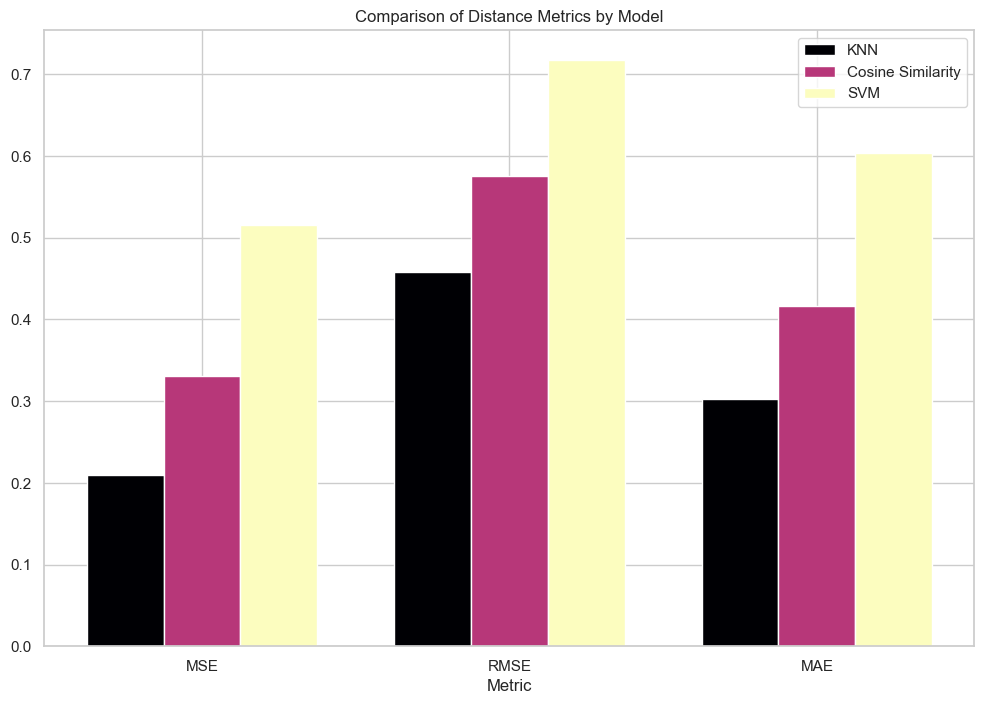

In [51]:
# Data for regression metrics
metrics = ['MSE', 'RMSE', 'MAE']
models = ['KNN', 'Cosine Similarity', 'SVM']

# Metrics values
values = {
    'KNN': [0.2102, 0.4585, 0.3022],
    'Cosine Similarity': [0.3309, 0.5753, 0.4168],
    'SVM': [0.5157, 0.7181, 0.6035]
}

# Define color palette
colors = plt.cm.magma(np.linspace(0, 1, len(models)))

# Plot
x = np.arange(len(metrics))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 8))

# Plot bars for each model
for i, model in enumerate(models):
    ax.bar(x + i*width, values[model], width, label=model, color=colors[i])

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Metric')
ax.set_title('Comparison of Distance Metrics by Model')
ax.set_xticks(x + width)
ax.set_xticklabels(metrics)
ax.legend()

plt.show()


 #### Bar Plot for Custom Classification Metrics

We'll create a bar plot to compare the Accuracy and Macro Average F1-Score for the KNN, Cosine Similarity, and SVM models.

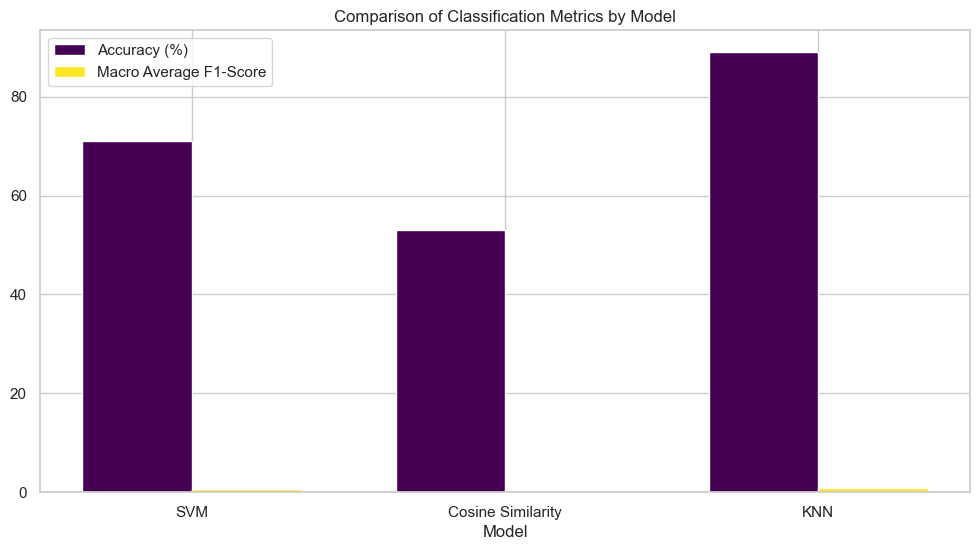

In [52]:
# Data for classification metrics
metrics = ['Accuracy (%)', 'Macro Average F1-Score']
models = [ 'SVM', 'Cosine Similarity', 'KNN' ]

# Metrics values
accuracy = [71, 53, 89]
f1_score = [0.70, 0.51, 0.77]

# Define color palette, use a valid colormap name like 'viridis'
colors = plt.cm.viridis(np.linspace(0, 1, len(metrics)))

# Plot
x = np.arange(len(models))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 6))

# Plot bars for Accuracy and F1-Score
bars1 = ax.bar(x - width/2, accuracy, width, label='Accuracy (%)', color=colors[0])
bars2 = ax.bar(x + width/2, f1_score, width, label='Macro Average F1-Score', color=colors[1])

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Model')
ax.set_title('Comparison of Classification Metrics by Model')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

plt.show()

- The KNN model performed best with an accuracy of 89% and a Macro Average F1-Score 77%
- The Cosine Similarity model is the second best model with an Accuracy of 71% and a Macro Average F1-Score 70%

In [58]:
# attraction_data.to_json('C:/Users/Hp/Documents/DATA_SCIENCE/MORINGA/PHASE_5-Final_Project/SafariHub/attraction_data.json')
# hotel_data.to_json('C:/Users/Hp/Documents/DATA_SCIENCE/MORINGA/PHASE_5-Final_Project/SafariHub/hotel_data.json')
# tours_data.to_json('C:/Users/Hp/Documents/DATA_SCIENCE/MORINGA/PHASE_5-Final_Project/SafariHub/tours_data.json')
# data.to_json('C:/Users/Hp/Documents/DATA_SCIENCE/MORINGA/PHASE_5-Final_Project/SafariHub/SafariHub_app/App_data/data.json')

# **Deployment**

*Import joblib*

In [ ]:
# Use joblib to save your models
joblib.dump(knn_attraction_mod, 'destination-recommender.joblib')
joblib.dump(knn_hotel_mod, 'hotel-recommender.joblib')
joblib.dump(knn_operator_mod, 'tourops-recommender.joblib')

['scaler.joblib']

In [80]:
# Save the vectorizers
joblib.dump(att_vectorizer, 'att_vectorizer.joblib')
joblib.dump(hot_vectorizer, 'hot_vectorizer.joblib')
joblib.dump(opr_vectorizer, 'opr_vectorizer.joblib')

['opr_vectorizer.joblib']

In [81]:
# Save the scalers
joblib.dump(att_scaler, 'att_scaler.joblib')
joblib.dump(hot_scaler, 'hot_scaler.joblib')
joblib.dump(opr_scaler, 'opr_scaler.joblib')

['opr_scaler.joblib']

***The Recommendation Process***

In [ ]:
# DO NOT RUN THIS CODE ON THE NOTE BOOK
# THIS CODE SHOULD BE RUN IN THE VIEWS.PY FILE IN THE APPLICATION

# import os
# import joblib
# import numpy as np
# import pandas as pd
# from sklearn.model_selection import train_test_split

# # Load model, vectorizer, and scaler
# base_dir = os.path.dirname(os.path.dirname(os.path.abspath(__file__)))

# models_dir = os.path.join(base_dir, 'Recommendation_models')
# app_data_dir = os.path.join(base_dir, 'App_data')


# # Define paths for models, vectorizers, and scalers
# model_paths = {
#     'attraction': os.path.join(models_dir, 'destination-recommender.joblib'),
#     'hotel': os.path.join(models_dir, 'hotel-recommender.joblib'),
#     'tourops': os.path.join(models_dir, 'tourops-recommender.joblib'),
# }
# vectorizer_paths = {
#     'attraction': os.path.join(models_dir, 'att_vectorizer.joblib'),
#     'hotel': os.path.join(models_dir, 'hot_vectorizer.joblib'),
#     'tourops': os.path.join(models_dir, 'opr_vectorizer.joblib'),
# }
# scaler_paths = {
#     'attraction': os.path.join(models_dir, 'att_scaler.joblib'),
#     'hotel': os.path.join(models_dir, 'hot_scaler.joblib'),
#     'tourops': os.path.join(models_dir, 'opr_scaler.joblib'),
# }

# # Load models, vectorizers, and scalers
# models = {k: joblib.load(v) for k, v in model_paths.items()}
# vectorizers = {k: joblib.load(v) for k, v in vectorizer_paths.items()}
# scalers = {k: joblib.load(v) for k, v in scaler_paths.items()}


# # Load datasets
# attraction_data_path = os.path.join(app_data_dir, 'attraction_data.json')
# hotel_data_path = os.path.join(app_data_dir, 'hotel_data.json')
# tours_data_path = os.path.join(app_data_dir, 'tours_data.json')
# data_path = os.path.join(app_data_dir, 'data.json')
# attraction_data = pd.read_json(attraction_data_path)
# hotel_data = pd.read_json(hotel_data_path)
# tours_data = pd.read_json(tours_data_path)
# data = pd.read_json(data_path)

# # Function to process the datasets and split them
# def prepare_data(df, vectorizer, scaler, bigram_col='flattened_bigrams', label_col='similar', fit_scaler=False):
#     # Define expected columns based on data type
#     if df.equals(attraction_data):
#         expected_columns = ['category_encoded', 'rating', 'numberOfReviews', 'photoCount', 'adjusted_sentiment',
#                             'location_encoded', 'province_encoded', 'priceLevelencoded', label_col]
#     elif df.equals(hotel_data):
#         expected_columns = ['category_encoded', 'rating', 'numberOfReviews', 'photoCount', 'adjusted_sentiment',
#                             'location_encoded', 'province_encoded', 'priceLevelencoded', 'upperPrice', 'lowerPrice', label_col]
#     elif df.equals(tours_data):
#         expected_columns = ['category_encoded', 'rating', 'numberOfReviews', 'photoCount', 'adjusted_sentiment',
#                             'location_encoded', 'province_encoded', 'priceLevelencoded', label_col]
#     else:
#         raise ValueError("Unsupported data_type provided")

#     # Ensure all expected columns are present
#     missing_columns = [col for col in expected_columns if col not in df.columns]
#     if missing_columns:
#         raise ValueError(f"Missing columns in data: {', '.join(missing_columns)}")

#     X = df[expected_columns]

#     # Apply vectorization to the bigram column
#     bigram_matrix = vectorizer.transform(df[bigram_col])
    
#     # Combine features
#     combined_features = np.hstack((X, bigram_matrix.toarray()))

#     # Fit the scaler if specified
#     if fit_scaler:
#         scaler.fit(combined_features)

#     # Transform the combined features
#     X_scaled = scaler.transform(combined_features)

#     return X_scaled, df['name'], df[label_col]

# # Prepare data for each dataset using corresponding vectorizers and scalers
# X_train_att, names_train_att, y_train_att = prepare_data(attraction_data, vectorizers['attraction'], scalers['attraction'], fit_scaler=True)
# X_train_hot, names_train_hot, y_train_hot = prepare_data(hotel_data, vectorizers['hotel'], scalers['hotel'], fit_scaler=True)
# X_train_ops, names_train_ops, y_train_ops = prepare_data(tours_data, vectorizers['tourops'], scalers['tourops'], fit_scaler=True)

# image_dict = data.set_index('name')['image'].to_dict()

# # Ensure images are mapped to attraction, hotel, and tours data
# attraction_data['image'] = attraction_data['name'].map(image_dict)
# hotel_data['image'] = hotel_data['name'].map(image_dict)
# tours_data['image'] = tours_data['name'].map(image_dict)

# def recommend_items(model, data, names, item_name, category, top_n=5):
#     item_idx = names[names == item_name].index[0]
#     distances, indices = model.kneighbors([data[item_idx]], n_neighbors=top_n+1)
#     recommended_indices = indices.flatten()[1:]

#     # Fetch recommended items from the original DataFrame
#     recommended_names = names.iloc[recommended_indices].values
    
#     # Select the appropriate DataFrame based on category
#     if category == 'attraction':
#         recommended_data = attraction_data[attraction_data['name'].isin(recommended_names)]
#         recommendations = recommended_data[['name', 'rating', 'location', 'image']].to_dict('records')
#     elif category == 'hotel':
#         recommended_data = hotel_data[hotel_data['name'].isin(recommended_names)]
#         recommendations = recommended_data[['name', 'rating', 'priceRange', 'priceLevel', 'image']].to_dict('records')
#     elif category == 'tour operator':
#         recommended_data = tours_data[tours_data['name'].isin(recommended_names)]
#         recommendations = recommended_data[['name', 'rating', 'numberOfReviews', 'main_bigram', 'image']].to_dict('records')
#     else:
#         recommendations = []

#     return recommendations

# **Conclusion**

>The KNN model stands out as the most reliable option for providing recommendations, especially in terms of consistency and lower error metrics. It also balances precision and recall well, making it more suitable for real-world applications. The SVM model may excel in specific scenarios, particularly where classification of "Not Similar" entities is more critical. However, it underperforms in recommending similar items compared to the KNN model.

  ***Model Selection and Performance:***

>`KNN Model`: The K-Nearest Neighbors (KNN) model appears to be the most reliable across different recommendation tasks. It provides lower error metrics (MSE, RMSE, MAE) and achieves higher precision, recall, and F1-scores, particularly in identifying "Similar" items. This model is well-suited for tasks where minimizing prediction errors and ensuring the accuracy of similarity detection are critical.

>`Cosine Similarity Model`: While the Cosine Similarity model also performs reasonably well, it has slightly higher error metrics compared to the KNN model. Its recommendations tend to have lower similarity scores, suggesting that it may not capture the similarity between items as effectively as KNN.
SVM Model: The Support Vector Machine (SVM) model consistently underperforms compared to KNN and Cosine Similarity, especially in predicting "Similar" items. This model might not be suitable for the recommendation tasks in this context.


>`Hotels`: The KNN model is particularly effective for hotel recommendations, providing more consistent proximity-based recommendations that are varied in price level and distance.

>`Attractions`: For attractions, both KNN and Cosine Similarity models have their strengths. KNN tends to provide slightly better precision and F1-scores, making it more reliable for recommending similar attractions.

>`Tour Operators`: KNN also outperforms in recommending similar tour operators, offering varied yet relevant options. It provides more consistent and relevant recommendations based on proximity to the target operator's location.


>The lower MSE, RMSE, and MAE values for the KNN model indicate that it is better at minimizing prediction errors. This is crucial for tasks that require precise similarity recommendations.

>The higher precision, recall, and F1-scores for the "Similar" class across different recommendation tasks suggest that the KNN model is better at correctly identifying similar items, reducing false positives and negatives.



# **Recommendations**

1. Model Tuning: Continue fine-tuning the KNN model to further reduce errors and improve classification metrics, particularly for the "Similar" class. This could involve adjusting the number of neighbors or using weighted distances.

2. Hybrid Model Approach: Consider combining the strengths of both KNN and Cosine Similarity models in a hybrid approach, where one model is used for initial filtering and the other for fine-tuning recommendations.

3. Develop and integrate advanced recommendation algorithms that curate personalized travel itineraries based on individual preferences, historical travel data, and real-time user inputs. This will enhance the relevance and appeal of suggested destinations and activities.

4. Provide real-time updates on local events, weather conditions, and special offers relevant to the traveler’s current or upcoming location. This can be achieved through push notifications or in-app alerts, ensuring that travelers have the most up-to-date information.

5. Consider expanding the recommendation system to include data and insights from other countries. This will allow for a broader range of travel options and cross-country promotional opportunities.

